# Question 1

## import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

eps = np.finfo(float).eps

## Utility Functions

Line Plotter

In [2]:
def plotter(label_x, label_y, title, x_axis, y_axis1, y_axis2 = None, mark=''):
    plt.figure(num=None, figsize=(6, 4), dpi=175, facecolor='w', edgecolor='k')
    # plotting the points  
    if y_axis2 == None:
        plt.plot(x_axis, y_axis1, marker = mark) 
    if y_axis2 != None:
        plt.plot(x_axis, y_axis1, marker = mark, label = 'Train') 
        plt.plot(x_axis, y_axis2, marker = mark ,label = 'Test') 
        plt.legend()
    # naming the x axis 
    plt.xlabel(label_x) 
    # naming the y axis 
    plt.ylabel(label_y) 
    # giving a title to my graph 
    plt.title(title) 
    plt.grid(True)
    # function to show the plot 
    plt.show()

Mean square error

In [3]:
# Mean square error
def MSE(predicted , actual):
    return np.mean((np.array(actual) - np.array(predicted))**2)

Mean absolute error

In [4]:
# Mean absolute error
def MAE(predicted , actual):
    return np.mean(np.abs((np.array(actual) - np.array(predicted))))

Mean absolute percentage error function

In [5]:
# Mean absolute percentage error function
def MAPE(predicted , actual):
    return np.mean(np.abs((np.array(actual) - np.array(predicted))/ np.array(actual))) * 100

Normalising the data set to reduce range of values

In [6]:
def normalize(randomDataSet, columns):
    for attr in columns[:-1]:
        randomDataSet[attr] = (randomDataSet[attr] - randomDataSet[attr].min())/(randomDataSet[attr].max() - randomDataSet[attr].min())
    # randomDataSet = (randomDataSet - randomDataSet.mean())/randomDataSet.std()
    # randomDataSet.head()


In [7]:
def modify_dataset(trainingSet, validationSet):
    train = trainingSet.values
    x_train = train[:,:-1]
    ones = np.ones([x_train.shape[0],1])
    x_train = np.concatenate((ones,x_train),axis=1)
    y_train = train[:,-1].reshape(-1,1)
    validate = validationSet.values
    x_validate = validate[:,:-1]
    ones = np.ones([x_validate.shape[0],1])
    x_validate = np.concatenate((ones,x_validate),axis=1)
    y_validate = validate[:,-1].reshape(-1,1)
    return x_train, y_train, x_validate , y_validate 

Cost Function

In [8]:
def costFunction(X, y, theta, lamda):
    return (np.sum(np.square(np.dot(X,theta.T) - y)) + lamda*np.sum(np.abs(theta[:,1:])))/(2*X.shape[0])



Gradient Decent Function

In [9]:
def gradientDecent(X, y, alpha, theta, lamda):
    theta[:,0] = theta[:,0] - alpha * np.sum((X[:,0].reshape(-1,1))*(np.dot(X , theta.T) - y) ,axis = 0)/X.shape[0]
    theta[:,1:] = theta[:,1:] - alpha * (np.sum(X[:,1:] * (np.dot(X , theta.T) - y), axis = 0).reshape(1,-1) + lamda*np.where(theta[:,1:] >= 0, 1, -1))/X.shape[0]
    return theta

Model Fitting Function

In [10]:
# Fitting the Model
def modelFitting(x_train, y_train, alpha, iterate, lamda):
    iteration_list = []
    cost_list = []
    global theta
    theta = np.zeros([1,x_train.shape[1]])
    for i in range(iterate):
        cost = costFunction(x_train, y_train, theta, lamda)
        theta = gradientDecent(x_train, y_train, alpha,theta, lamda)
        iteration_list.append(i)
        cost_list.append(cost)
        print(lamda,i,cost)
    return theta, iteration_list, cost_list

Valdidation Function for validating the data set for error calculation

In [11]:
def valdidation(x_validate , y_validate ,theta):
    predicted = np.dot(x_validate,theta.T)
    actual = y_validate
    for i in range(0,len(predicted)):
        print(predicted[i])
        print(actual[i])
        print("-----------")
    return predicted , actual



### Reading the Data Set

In [12]:
randomDataSet = dataSet = pd.read_csv("./../input_data/AdmissionDataset/data.csv")
randomDataSet = dataSet.sample(frac = 1).reset_index(drop = True)
Class = "Chance of Admit "
columns = ['Serial No.' , 'GRE Score' , 'TOEFL Score' , 'University Rating' , 'SOP' , 'LOR' , 'CGPA' , 'Research' , Class]
randomDataSet.columns = columns
columns = columns[1:]
randomDataSet = randomDataSet[columns]
# randomDataSet

### Normalize Data Set

In [13]:
normalize(randomDataSet, columns)
# randomDataSet

### Data Set spliting

In [14]:
trainingSet, validationSet = np.split(randomDataSet, [int(0.8*len(randomDataSet))])


In [15]:
x_train, y_train, x_validate , y_validate = modify_dataset(trainingSet, validationSet)

### Setting parameters for our model

In [16]:
alpha = 0.01
lamda = 0
iterate = 400
# theta = np.zeros([1,x_train.shape[1]])

### Training the Model

In [17]:
theta, iteration_list, cost_list = modelFitting(x_train, y_train, alpha, iterate, lamda)

0 0 0.26506111111111114
0 1 0.24819211664121282
0 2 0.2324189238538789
0 3 0.21767030453030278
0 4 0.20387966066341306
0 5 0.1909847234633147
0 6 0.1789272719295782
0 7 0.167652869718383
0 8 0.15711061911520896
0 9 0.14725293100108441
0 10 0.13803530977268785
0 11 0.1294161522441889
0 12 0.12135655962190922
0 13 0.11382016170197064
0 14 0.10677295249634457
0 15 0.10018313654436929
0 16 0.09402098521510008
0 17 0.08825870235101235
0 18 0.08287029864580017
0 19 0.07783147418848829
0 20 0.07311950864298661
0 21 0.06871315856672634
0 22 0.06459256140428471
0 23 0.06073914572207431
0 24 0.057135547278382076
0 25 0.05376553054941706
0 26 0.05061391535668652
0 27 0.04766650826407661
0 28 0.04491003843457213
0 29 0.04233209765670645
0 30 0.039921084269679004
0 31 0.03766615073369872
0 32 0.03555715460858771
0 33 0.03358461271908381
0 34 0.0317396582996839
0 35 0.03001400092533666
0 36 0.028399889046885063
0 37 0.026890074961931316
0 38 0.025477782062805
0 39 0.024156674213606656
0 40 0.0229208

### Validating the Model

In [18]:
predicted , actual = valdidation(x_validate , y_validate ,theta)


[0.67965607]
[0.64]
-----------
[0.8151208]
[0.77]
-----------
[0.70010181]
[0.73]
-----------
[0.98306576]
[0.97]
-----------
[0.92525423]
[0.93]
-----------
[0.91189218]
[0.92]
-----------
[0.93876611]
[0.86]
-----------
[0.79528595]
[0.79]
-----------
[0.64909261]
[0.61]
-----------
[0.97229567]
[0.92]
-----------
[0.79739397]
[0.77]
-----------
[0.7050755]
[0.72]
-----------
[0.96851718]
[0.94]
-----------
[0.82887681]
[0.84]
-----------
[0.66174934]
[0.67]
-----------
[0.86241721]
[0.79]
-----------
[0.68982668]
[0.71]
-----------
[0.45746599]
[0.69]
-----------
[0.90244869]
[0.87]
-----------
[0.76000708]
[0.74]
-----------
[0.56745642]
[0.68]
-----------
[0.7383845]
[0.8]
-----------
[0.81325615]
[0.79]
-----------
[0.89636157]
[0.86]
-----------
[0.55991977]
[0.64]
-----------
[0.60237509]
[0.67]
-----------
[0.88049352]
[0.91]
-----------
[0.47886489]
[0.63]
-----------
[0.57183866]
[0.68]
-----------
[0.59034016]
[0.72]
-----------
[0.87328556]
[0.87]
-----------
[0.6931011]


### Plotting the Cost vs Iterations

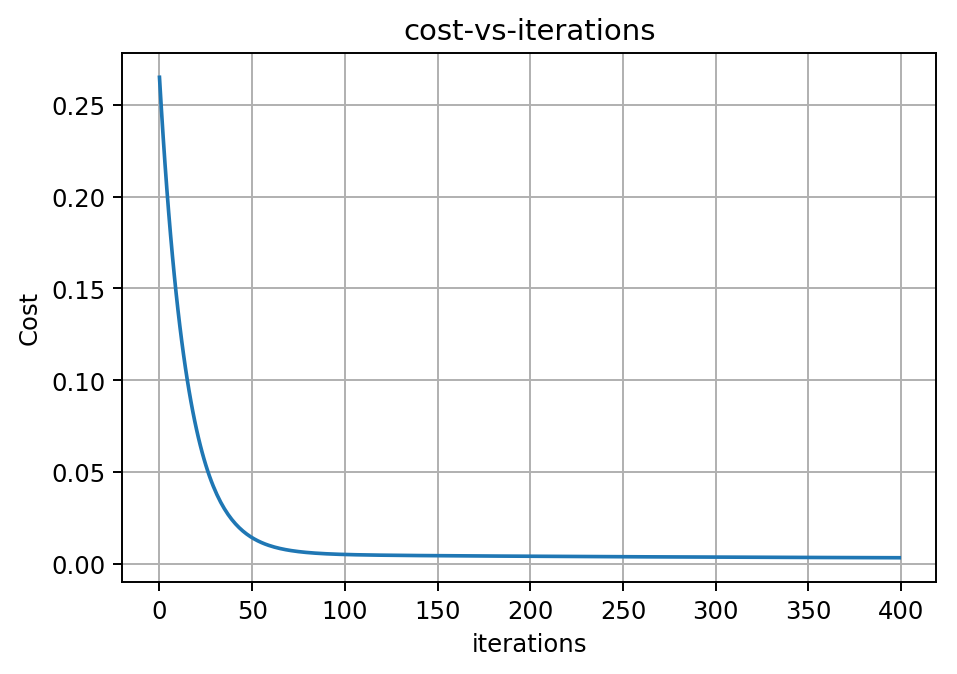

In [19]:
plotter('iterations','Cost','cost-vs-iterations',iteration_list,cost_list)


### Mean Square Error

In [20]:
MSE(predicted , actual)


0.0056352768955674985

### Mean Absolute Error

In [21]:
MAE(predicted , actual)


0.05709606321327867

### Mean Absolute Percentage Error

In [22]:
MAPE(predicted , actual)


8.485941730288358

In [23]:
lamda_mse_train = []
lamda_mse_validate = []
lamda_values = np.arange(0, 50, 1)
# print (lamda_values)
for lamda in lamda_values:
    theta, iteration_list, cost_list = modelFitting(x_train, y_train, alpha, iterate, lamda)
    predicted , actual = valdidation(x_train , y_train ,theta)
    lamda_mse_train.append(MSE(predicted , actual))
    predicted , actual = valdidation(x_validate , y_validate ,theta)
    lamda_mse_validate.append(MSE(predicted , actual))
    print("------------")
    

0 0 0.26506111111111114
0 1 0.24819211664121282
0 2 0.2324189238538789
0 3 0.21767030453030278
0 4 0.20387966066341306
0 5 0.1909847234633147
0 6 0.1789272719295782
0 7 0.167652869718383
0 8 0.15711061911520896
0 9 0.14725293100108441
0 10 0.13803530977268785
0 11 0.1294161522441889
0 12 0.12135655962190922
0 13 0.11382016170197064
0 14 0.10677295249634457
0 15 0.10018313654436929
0 16 0.09402098521510008
0 17 0.08825870235101235
0 18 0.08287029864580017
0 19 0.07783147418848829
0 20 0.07311950864298661
0 21 0.06871315856672634
0 22 0.06459256140428471
0 23 0.06073914572207431
0 24 0.057135547278382076
0 25 0.05376553054941706
0 26 0.05061391535668652
0 27 0.04766650826407661
0 28 0.04491003843457213
0 29 0.04233209765670645
0 30 0.039921084269679004
0 31 0.03766615073369872
0 32 0.03555715460858771
0 33 0.03358461271908381
0 34 0.0317396582996839
0 35 0.03001400092533666
0 36 0.028399889046885063
0 37 0.026890074961931316
0 38 0.025477782062805
0 39 0.024156674213606656
0 40 0.0229208

-----------
[0.58087423]
[0.71]
-----------
[0.53088766]
[0.65]
-----------
[0.87997599]
[0.86]
-----------
[0.59020939]
[0.38]
-----------
[0.53485249]
[0.72]
-----------
[0.45935587]
[0.57]
-----------
[0.62771691]
[0.49]
-----------
[0.63248832]
[0.69]
-----------
[1.02373585]
[0.97]
-----------
[0.78657136]
[0.73]
-----------
[0.68752474]
[0.72]
-----------
[0.59862949]
[0.61]
-----------
[0.58690458]
[0.56]
-----------
[0.65282184]
[0.71]
-----------
[0.79431265]
[0.76]
-----------
[0.57790514]
[0.73]
-----------
[0.79563364]
[0.76]
-----------
[0.72879565]
[0.76]
-----------
[0.69465367]
[0.62]
-----------
[0.86952753]
[0.77]
-----------
[0.47508314]
[0.61]
-----------
[0.69151907]
[0.71]
-----------
[0.70087908]
[0.7]
-----------
[0.62155713]
[0.72]
-----------
[0.9524452]
[0.9]
-----------
[0.70874431]
[0.74]
-----------
[0.72778437]
[0.79]
-----------
[0.80761352]
[0.79]
-----------
[0.76078054]
[0.8]
-----------
[0.6564792]
[0.7]
-----------
[0.43162953]
[0.56]
-----------
[0

1 84 0.006987465389106319
1 85 0.006916643962626855
1 86 0.006849774966852406
1 87 0.00678660623318913
1 88 0.006726901884101909
1 89 0.0066704412772480935
1 90 0.006617018018145982
1 91 0.006566439036926301
1 92 0.006518523725004093
1 93 0.006473103127778954
1 94 0.006430019189724503
1 95 0.006389124048464414
1 96 0.006350279374653414
1 97 0.006313355754688383
1 98 0.006278232113468084
1 99 0.006244795174600605
1 100 0.006212938955626749
1 101 0.006182564295985513
1 102 0.006153578415595575
1 103 0.006125894502064805
1 104 0.006099431324669021
1 105 0.0060741128733619405
1 106 0.006049868021191168
1 107 0.0060266302086007225
1 108 0.0060043371481992135
1 109 0.005982930548665182
1 110 0.0059623558565473165
1 111 0.0059425620147980475
1 112 0.005923501236954448
1 113 0.005905128795950807
1 114 0.0058874028266134295
1 115 0.0058702841409496555
1 116 0.0058537360554009096
1 117 0.0058377242292834836
1 118 0.005822216513691125
1 119 0.005807182810180722
1 120 0.005792594938606379
1 121 0.

-----------
[0.84248331]
[0.81]
-----------
[0.76999535]
[0.71]
-----------
[0.6364474]
[0.64]
-----------
[0.61005162]
[0.77]
-----------
[0.35608623]
[0.49]
-----------
[0.81832532]
[0.85]
-----------
[0.73371024]
[0.8]
-----------
[0.89219285]
[0.78]
-----------
[0.89706959]
[0.88]
-----------
[0.65644703]
[0.7]
-----------
[0.94816851]
[0.92]
-----------
[0.55980732]
[0.63]
-----------
[0.71349835]
[0.76]
-----------
[0.65784462]
[0.71]
-----------
[0.87867563]
[0.78]
-----------
[0.59227565]
[0.64]
-----------
[0.41554029]
[0.59]
-----------
[0.58169275]
[0.71]
-----------
[0.53324729]
[0.65]
-----------
[0.87272946]
[0.86]
-----------
[0.59149613]
[0.38]
-----------
[0.53720322]
[0.72]
-----------
[0.46384854]
[0.57]
-----------
[0.62774865]
[0.49]
-----------
[0.63227958]
[0.69]
-----------
[1.0120783]
[0.97]
-----------
[0.78168392]
[0.73]
-----------
[0.68600332]
[0.72]
-----------
[0.5994046]
[0.61]
-----------
[0.58829389]
[0.56]
-----------
[0.65179326]
[0.71]
-----------
[

2 93 0.007619322544713584
2 94 0.007573564937000479
2 95 0.007530039255516999
2 96 0.007488606507227523
2 97 0.007449136594734122
2 98 0.007411507742408545
2 99 0.007375605959684553
2 100 0.007341324539099693
2 101 0.007308563586832155
2 102 0.007277229583624853
2 103 0.007247234974125606
2 104 0.007218497782800393
2 105 0.0071909412546963146
2 106 0.007164493519442749
2 107 0.007139087276983848
2 108 0.007114659503633349
2 109 0.007091151177134179
2 110 0.007068507019490762
2 111 0.0070466752564221045
2 112 0.007025607392358266
2 113 0.007005257999973
2 114 0.006985584523310525
2 115 0.006966547093625661
2 116 0.0069481083571136405
2 117 0.006930233313759423
2 118 0.00691288916658626
2 119 0.006896045180630028
2 120 0.006879672551009551
2 121 0.0068637442795039605
2 122 0.006848235059086354
2 123 0.006833121165898804
2 124 0.006818380358187052
2 125 0.0068039917817445845
2 126 0.006789935881444907
2 127 0.006776194318468187
2 128 0.006762749892853971
2 129 0.006749586471035532
2 130 0

[0.45812536]
[0.51]
-----------
[0.58737919]
[0.71]
-----------
[0.74389947]
[0.81]
-----------
[0.65206404]
[0.65]
-----------
[0.8562054]
[0.89]
-----------
[0.59119213]
[0.66]
-----------
[0.75893936]
[0.52]
-----------
[0.54238367]
[0.34]
-----------
[0.62415453]
[0.49]
-----------
[0.4358667]
[0.56]
-----------
[0.69043759]
[0.75]
-----------
[0.63811749]
[0.68]
-----------
[0.77158048]
[0.76]
-----------
[0.66002035]
[0.53]
-----------
[0.49918503]
[0.45]
-----------
[0.93670559]
[0.93]
-----------
[0.55027917]
[0.62]
-----------
[0.43273652]
[0.49]
-----------
[0.52478421]
[0.61]
-----------
[0.74016211]
[0.75]
-----------
[0.92229898]
[0.92]
-----------
[0.55211146]
[0.71]
-----------
[0.55390021]
[0.73]
-----------
[0.43587562]
[0.43]
-----------
[0.80094162]
[0.74]
-----------
[0.98799746]
[0.94]
-----------
[0.388281]
[0.47]
-----------
[0.76206178]
[0.73]
-----------
[0.50237349]
[0.44]
-----------
[0.78007451]
[0.74]
-----------
[0.51672702]
[0.7]
-----------
[0.66462874]


3 157 0.007468131974609603
3 158 0.0074578742860046225
3 159 0.007447696519972545
3 160 0.007437596054864453
3 161 0.007427570410258965
3 162 0.007417617238551041
3 163 0.007407734317062875
3 164 0.007397919540643616
3 165 0.007388170914727059
3 166 0.007378486548818201
3 167 0.0073688646503815795
3 168 0.007359303519105969
3 169 0.007349801541521664
3 170 0.007340357185948086
3 171 0.007330968997750899
3 172 0.007321635594889147
3 173 0.007312355663734124
3 174 0.00730312795514295
3 175 0.007293951280770811
3 176 0.007284824509606932
3 177 0.007275746564720231
3 178 0.0072667164202015735
3 179 0.007257733098290303
3 180 0.0072487956666735685
3 181 0.007239903235947668
3 182 0.0072310549572313235
3 183 0.007222250019921451
3 184 0.007213487649582557
3 185 0.0072047671059615
3 186 0.007196087681119846
3 187 0.00718744869767658
3 188 0.007178849507154268
3 189 0.007170289488422459
3 190 0.007161768046232182
3 191 0.007153284609836055
3 192 0.007144838631688705
3 193 0.007136429586222616


-----------
[0.80510807]
[0.69]
-----------
[0.67261676]
[0.73]
-----------
[0.79041829]
[0.73]
-----------
[0.91927112]
[0.86]
-----------
[0.50408401]
[0.64]
-----------
[0.71341541]
[0.64]
-----------
[0.6538737]
[0.78]
-----------
[0.62247745]
[0.69]
-----------
[0.59804173]
[0.62]
-----------
[0.65557145]
[0.61]
-----------
[0.67150335]
[0.81]
-----------
[0.97592578]
[0.94]
-----------
[0.60510008]
[0.62]
-----------
[0.63757765]
[0.7]
-----------
[0.82249605]
[0.85]
-----------
[0.91969156]
[0.88]
-----------
[0.62753135]
[0.59]
-----------
[0.46295687]
[0.51]
-----------
[0.58840187]
[0.71]
-----------
[0.74051518]
[0.81]
-----------
[0.65148051]
[0.65]
-----------
[0.8490306]
[0.89]
-----------
[0.59217175]
[0.66]
-----------
[0.75515693]
[0.52]
-----------
[0.54504153]
[0.34]
-----------
[0.62420975]
[0.49]
-----------
[0.44123946]
[0.56]
-----------
[0.68854252]
[0.75]
-----------
[0.63828155]
[0.68]
-----------
[0.76729063]
[0.76]
-----------
[0.65943526]
[0.53]
-----------

4 225 0.0078059812850991925
4 226 0.007797661796105366
4 227 0.007789372765383762
4 228 0.007781113984843054
4 229 0.007772885251056441
4 230 0.00776468636507899
4 231 0.0077565171322735126
4 232 0.00774837736214449
4 233 0.00774026686817964
4 234 0.007732185467698731
4 235 0.0077241329817092814
4 236 0.007716109234768778
4 237 0.007708114054853079
4 238 0.007700147273230712
4 239 0.007692208724342748
4 240 0.007684298245687971
4 241 0.007676415677713096
4 242 0.007668560863707794
4 243 0.00766073364970423
4 244 0.007652933884380957
4 245 0.00764516141897096
4 246 0.007637416107173548
4 247 0.0076296978050700475
4 248 0.007622006371043012
4 249 0.007614341665698822
4 250 0.007606703551793512
4 251 0.007599091894161676
4 252 0.007591506559648269
4 253 0.007583947417043255
4 254 0.007576414337018859
4 255 0.0075689071920693966
4 256 0.007561425856453509
4 257 0.0075539702061387225
4 258 0.007546540118748208
4 259 0.007539135473509647
4 260 0.007531756151206122
4 261 0.007524402034128926


[0.67236282]
[0.79]
-----------
[0.54626213]
[0.81]
-----------
[0.63732108]
[0.74]
-----------
[0.44193426]
[0.53]
-----------
[0.5052566]
[0.46]
-----------
[0.69082909]
[0.74]
-----------
[0.51907077]
[0.52]
-----------
[0.63565157]
[0.5]
-----------
[0.56623021]
[0.64]
-----------
[0.70015198]
[0.75]
-----------
[0.93284604]
[0.96]
-----------
[0.88651338]
[0.87]
-----------
[0.70082778]
[0.61]
-----------
[0.8660361]
[0.9]
-----------
[0.67824045]
[0.65]
-----------
[0.58716976]
[0.71]
-----------
[0.83903039]
[0.86]
-----------
[0.55048912]
[0.72]
-----------
[0.50772874]
[0.47]
-----------
[0.58246834]
[0.44]
-----------
[0.57898499]
[0.75]
-----------
[0.6656983]
[0.71]
-----------
[0.48058224]
[0.6]
-----------
[0.62843937]
[0.68]
-----------
[0.69594429]
[0.79]
-----------
[0.58501257]
[0.73]
-----------
[0.7908139]
[0.69]
-----------
[0.77883835]
[0.78]
-----------
[0.63519351]
[0.62]
-----------
[0.70278048]
[0.74]
-----------
[0.78415894]
[0.8]
-----------
[0.5745056]
[0.5

5 304 0.008058650206687164
5 305 0.008051552794067218
5 306 0.00804447895962311
5 307 0.008037428614975492
5 308 0.008030401672308535
5 309 0.00802339804435953
5 310 0.008016417644408847
5 311 0.008009460386270215
5 312 0.008002526184281253
5 313 0.007995614953294353
5 314 0.007988726608667805
5 315 0.00798186106625721
5 316 0.007975018242407147
5 317 0.007968198053943098
5 318 0.00796140041816362
5 319 0.007954625252832739
5 320 0.007947872476172601
5 321 0.0079411420068563
5 322 0.007934433764000961
5 323 0.007927747667160989
5 324 0.00792108363632156
5 325 0.007914441591892264
5 326 0.007907821454700944
5 327 0.007901223145987735
5 328 0.007894646587399239
5 329 0.007888091700982897
5 330 0.007881558409181508
5 331 0.007875046634827902
5 332 0.007868556301139779
5 333 0.007862087331714663
5 334 0.007855639650525036
5 335 0.007849213181913565
5 336 0.007842807850588503
5 337 0.007836423581619189
5 338 0.007830060300431659
5 339 0.007823717932804425
5 340 0.007817396404864316
5 341 0.

-----------
[0.97465373]
[0.96]
-----------
[0.90926363]
[0.95]
-----------
[0.55455016]
[0.66]
-----------
[0.67810227]
[0.79]
-----------
[0.84254924]
[0.81]
-----------
[0.78045678]
[0.78]
-----------
[0.68354228]
[0.8]
-----------
[0.6797585]
[0.61]
-----------
[0.70674196]
[0.57]
-----------
[0.54695017]
[0.67]
-----------
[0.87824622]
[0.91]
-----------
[0.73790456]
[0.73]
-----------
[0.84564739]
[0.85]
-----------
[0.73155148]
[0.77]
-----------
[0.35495312]
[0.42]
-----------
[0.6953757]
[0.82]
-----------
[0.75746493]
[0.8]
-----------
[0.74985407]
[0.78]
-----------
[0.63649931]
[0.61]
-----------
[0.77602026]
[0.79]
-----------
[0.61328715]
[0.73]
-----------
[0.50601001]
[0.42]
-----------
[0.62875682]
[0.58]
-----------
[0.59710129]
[0.57]
-----------
[0.59642439]
[0.71]
-----------
[0.76220084]
[0.83]
-----------
[0.6408008]
[0.68]
-----------
[0.68451375]
[0.65]
-----------
[0.9511976]
[0.94]
-----------
[0.44391779]
[0.58]
-----------
[0.64248766]
[0.67]
-----------
[0

[0.64]
-----------
[0.72684211]
[0.55]
-----------
[0.93678764]
[0.93]
-----------
[0.70997371]
[0.78]
-----------
[0.75612649]
[0.84]
-----------
[0.83839195]
[0.86]
-----------
[0.74222908]
[0.72]
-----------
[0.76385209]
[0.82]
-----------
[0.5454125]
[0.46]
-----------
[0.7723868]
[0.8]
-----------
[0.74286229]
[0.78]
-----------
[0.74621066]
[0.74]
-----------
[0.54956265]
[0.62]
-----------
[0.76144109]
[0.82]
-----------
[0.75103804]
[0.76]
-----------
[0.47186958]
[0.61]
-----------
[0.67464281]
[0.72]
-----------
[0.68996967]
[0.62]
-----------
[0.7426349]
[0.8]
-----------
[0.64435066]
[0.76]
-----------
[0.44206001]
[0.52]
-----------
[0.68876857]
[0.79]
-----------
[0.77437185]
[0.81]
-----------
[0.58045398]
[0.62]
-----------
[0.46253817]
[0.54]
-----------
[0.91933516]
[0.95]
-----------
[0.52092561]
[0.62]
-----------
[0.78696373]
[0.73]
-----------
[0.72928484]
[0.71]
-----------
[0.66790664]
[0.57]
-----------
[0.60847944]
[0.57]
-----------
[0.93035818]
[0.96]
------

7 170 0.011139396903426543
7 171 0.011124577640917588
7 172 0.011109846453601543
7 173 0.011095201434932134
7 174 0.011080640759891245
7 175 0.011066162680803515
7 176 0.011051765523387203
7 177 0.01103744768302709
7 178 0.011023207621256175
7 179 0.01100904386243366
7 180 0.01099495499060756
7 181 0.010980939646550954
7 182 0.010966996524961579
7 183 0.010953124371815164
7 184 0.010939321981863355
7 185 0.01092558819626784
7 186 0.010911921900362597
7 187 0.010898322021536852
7 188 0.010884787527231678
7 189 0.01087131742304364
7 190 0.010857910750929324
7 191 0.010844566587504871
7 192 0.01083128404243511
7 193 0.010818062256907119
7 194 0.010804900402183421
7 195 0.010791797678230257
7 196 0.010778753312416688
7 197 0.010765766558280541
7 198 0.010752836694357419
7 199 0.01073996302306924
7 200 0.01072714486966898
7 201 0.010714381581238525
7 202 0.010701672525736627
7 203 0.01068901709109426
7 204 0.010676414684354749
7 205 0.010663864730856202
7 206 0.01065136667345398
7 207 0.010

[0.58762053]
[0.7]
-----------
[0.59805962]
[0.67]
-----------
[0.76239082]
[0.71]
-----------
[0.93367315]
[0.96]
-----------
[0.61099197]
[0.54]
-----------
[0.57606785]
[0.62]
-----------
[0.59783397]
[0.69]
-----------
[0.5617858]
[0.69]
-----------
[0.40952833]
[0.46]
-----------
[0.86199627]
[0.93]
-----------
[0.59655595]
[0.64]
-----------
[0.6445085]
[0.72]
-----------
[0.79084963]
[0.84]
-----------
[0.63188598]
[0.54]
-----------
[0.81816336]
[0.9]
-----------
[0.84866443]
[0.89]
-----------
[0.62516312]
[0.53]
-----------
[0.78697752]
[0.82]
-----------
[0.84241824]
[0.87]
-----------
[0.82002244]
[0.82]
-----------
[0.70796843]
[0.73]
-----------
[0.63920225]
[0.69]
-----------
[0.58758252]
[0.68]
-----------
[0.76315931]
[0.84]
-----------
[0.55211381]
[0.64]
-----------
[0.89116092]
[0.86]
-----------
[0.50180394]
[0.38]
-----------
[0.91874145]
[0.94]
-----------
[0.86139123]
[0.93]
-----------
[0.83543133]
[0.89]
-----------
[0.69513703]
[0.71]
-----------
[0.43089615]

8 322 0.01019462131508236
8 323 0.01018548740896451
8 324 0.010176384015671181
8 325 0.010167311026321327
8 326 0.010158268332627018
8 327 0.010149255826884359
8 328 0.010140273401964706
8 329 0.010131320951306123
8 330 0.010122398368905083
8 331 0.010113505549308418
8 332 0.010104642387605481
8 333 0.01009580877942057
8 334 0.010087004620905504
8 335 0.010078229808732493
8 336 0.010069484240087127
8 337 0.010060767812661612
8 338 0.010052080424648172
8 339 0.01004342197473266
8 340 0.010034792362088294
8 341 0.010026191486369634
8 342 0.010017619247706656
8 343 0.010009075546699026
8 344 0.010000560284410527
8 345 0.009992073362363626
8 346 0.009983614682534168
8 347 0.009975184147346257
8 348 0.009966781659667212
8 349 0.009958407122802722
8 350 0.009950060440492056
8 351 0.00994174151690346
8 352 0.009933450256629622
8 353 0.00992518656468329
8 354 0.009916950346492964
8 355 0.009908741507898737
8 356 0.009900559955148212
8 357 0.009892405594892517
8 358 0.009884278334182435
8 359 0

[0.61]
-----------
[0.69954359]
[0.57]
-----------
[0.55622493]
[0.67]
-----------
[0.85245904]
[0.91]
-----------
[0.72712292]
[0.73]
-----------
[0.82387184]
[0.85]
-----------
[0.7213664]
[0.77]
-----------
[0.38119073]
[0.42]
-----------
[0.6872041]
[0.82]
-----------
[0.74413764]
[0.8]
-----------
[0.73805686]
[0.78]
-----------
[0.63505105]
[0.61]
-----------
[0.76145944]
[0.79]
-----------
[0.61485218]
[0.73]
-----------
[0.51770622]
[0.42]
-----------
[0.62988656]
[0.58]
-----------
[0.59964053]
[0.57]
-----------
[0.59976767]
[0.71]
-----------
[0.7478963]
[0.83]
-----------
[0.63827419]
[0.68]
-----------
[0.67890817]
[0.65]
-----------
[0.91835476]
[0.94]
-----------
[0.46127932]
[0.58]
-----------
[0.63955917]
[0.67]
-----------
[0.73521495]
[0.76]
-----------
[0.64945903]
[0.76]
-----------
[0.85940284]
[0.92]
-----------
[0.87014394]
[0.92]
-----------
------------
9 0 0.26506111111111114
9 1 0.24923586871186182
9 2 0.23442603788121452
9 3 0.22056599629846818
9 4 0.207594

[0.60560552]
[0.61]
-----------
[0.59940839]
[0.56]
-----------
[0.6435646]
[0.71]
-----------
[0.74855179]
[0.76]
-----------
[0.58886743]
[0.73]
-----------
[0.75087121]
[0.76]
-----------
[0.70292217]
[0.76]
-----------
[0.67944428]
[0.62]
-----------
[0.81035136]
[0.77]
-----------
[0.51286412]
[0.61]
-----------
[0.67103095]
[0.71]
-----------
[0.68275809]
[0.7]
-----------
[0.62463365]
[0.72]
-----------
[0.86554722]
[0.9]
-----------
[0.68693791]
[0.74]
-----------
[0.70142828]
[0.79]
-----------
[0.76120563]
[0.79]
-----------
[0.72664329]
[0.8]
-----------
[0.64683955]
[0.7]
-----------
[0.48164485]
[0.56]
-----------
[0.69203609]
[0.72]
-----------
[0.57834424]
[0.67]
-----------
[0.81174337]
[0.84]
-----------
[0.82994973]
[0.88]
-----------
[0.74799123]
[0.84]
-----------
[0.85208046]
[0.91]
-----------
[0.66627891]
[0.72]
-----------
[0.65624255]
[0.7]
-----------
[0.78528309]
[0.85]
-----------
[0.48819945]
[0.56]
-----------
[0.62274387]
[0.69]
-----------
[0.59139585]
[

10 121 0.01498925851625812
10 122 0.014956341916785042
10 123 0.014924014719976873
10 124 0.014892250271522803
10 125 0.014861023396834473
10 126 0.014830310312769724
10 127 0.014800088544834639
10 128 0.01477033684951641
10 129 0.014741035141421808
10 130 0.01471216442491687
10 131 0.014683706729983004
10 132 0.014655645052022893
10 133 0.014627963295366751
10 134 0.014600646220245367
10 135 0.014573679393011404
10 136 0.014547049139404349
10 137 0.014520742500667611
10 138 0.01449474719233851
10 139 0.014469051565543328
10 140 0.014443644570640353
10 141 0.014418515723063782
10 142 0.014393655071230851
10 143 0.014369053166383192
10 144 0.014344701034241762
10 145 0.01432059014836227
10 146 0.014296712405085238
10 147 0.014273060099981654
10 148 0.014249625905701255
10 149 0.01422640285113666
10 150 0.014203384301821739
10 151 0.014180563941488143
10 152 0.014157935754708372
10 153 0.014135494010558611
10 154 0.014113233247238474
10 155 0.01409114825758907
10 156 0.014069234075454242

[0.44]
-----------
[0.74169196]
[0.74]
-----------
[0.54110396]
[0.7]
-----------
[0.65414863]
[0.67]
-----------
[0.77374782]
[0.66]
-----------
[0.67591132]
[0.75]
-----------
[0.48644557]
[0.54]
-----------
[0.55311089]
[0.65]
-----------
[0.60466055]
[0.57]
-----------
[0.89777983]
[0.97]
-----------
[0.61250273]
[0.48]
-----------
[0.85045523]
[0.91]
-----------
[0.54466369]
[0.39]
-----------
[0.79168086]
[0.8]
-----------
[0.57802101]
[0.52]
-----------
[0.83504719]
[0.92]
-----------
[0.72805277]
[0.84]
-----------
[0.50690977]
[0.56]
-----------
[0.88771611]
[0.94]
-----------
[0.61369354]
[0.6]
-----------
[0.47326351]
[0.58]
-----------
[0.78222636]
[0.76]
-----------
[0.8642363]
[0.91]
-----------
[0.83703586]
[0.96]
-----------
[0.65293605]
[0.77]
-----------
[0.77209494]
[0.8]
-----------
[0.77286749]
[0.82]
-----------
[0.82424949]
[0.89]
-----------
[0.59413005]
[0.71]
-----------
[0.77504443]
[0.85]
-----------
[0.55435849]
[0.67]
-----------
[0.55902207]
[0.64]
------

11 270 0.012865361474781437
11 271 0.012850955886090731
11 272 0.012836599887202203
11 273 0.01282229326306986
11 274 0.012808035801057955
11 275 0.012793827290876116
11 276 0.012779667524516664
11 277 0.01276555629619405
11 278 0.012751493402286353
11 279 0.01273747864127872
11 280 0.012723511813708713
11 281 0.012709592722113512
11 282 0.012695721170978828
11 283 0.012681896966689572
11 284 0.012668119917482122
11 285 0.012654389833398201
11 286 0.012640706526240265
11 287 0.012627069809528364
11 288 0.012613479498458422
11 289 0.012599935409861906
11 290 0.01258643736216679
11 291 0.012572985175359798
11 292 0.012559578670949898
11 293 0.012546217671932957
11 294 0.012532902002757569
11 295 0.012519631489291956
11 296 0.01250640595879198
11 297 0.012493225239870141
11 298 0.012480089162465588
11 299 0.01246699755781512
11 300 0.012453950258425057
11 301 0.012440947098044056
11 302 0.012427987911636759
11 303 0.012415072535358306
11 304 0.012402200806529621
11 305 0.01238937256361351

-----------
[0.68227124]
[0.72]
-----------
[0.86058656]
[0.94]
-----------
[0.7623103]
[0.84]
-----------
[0.65038835]
[0.67]
-----------
[0.78890151]
[0.79]
-----------
[0.66998668]
[0.71]
-----------
[0.50852101]
[0.69]
-----------
[0.81652235]
[0.87]
-----------
[0.72196073]
[0.74]
-----------
[0.58266888]
[0.68]
-----------
[0.70199147]
[0.8]
-----------
[0.75066128]
[0.79]
-----------
[0.81082933]
[0.86]
-----------
[0.57889086]
[0.64]
-----------
[0.60972749]
[0.67]
-----------
[0.79848259]
[0.91]
-----------
[0.52085077]
[0.63]
-----------
[0.59053557]
[0.68]
-----------
[0.59842537]
[0.72]
-----------
[0.79409779]
[0.87]
-----------
[0.67421728]
[0.46]
-----------
[0.68107246]
[0.73]
-----------
[0.59994214]
[0.65]
-----------
[0.51201155]
[0.59]
-----------
[0.81309319]
[0.9]
-----------
[0.63659127]
[0.72]
-----------
[0.73436305]
[0.82]
-----------
[0.67629089]
[0.76]
-----------
[0.67064509]
[0.76]
-----------
[0.84416098]
[0.93]
-----------
[0.77501861]
[0.87]
-----------

[0.56339394]
[0.68]
-----------
[0.61598418]
[0.66]
-----------
[0.84092609]
[0.95]
-----------
[0.86041273]
[0.93]
-----------
[0.61566269]
[0.65]
-----------
[0.6246086]
[0.63]
-----------
[0.58175753]
[0.64]
-----------
[0.72355122]
[0.74]
-----------
[0.58293677]
[0.7]
-----------
[0.62548229]
[0.64]
-----------
[0.55582482]
[0.64]
-----------
[0.58296264]
[0.57]
-----------
[0.60380673]
[0.64]
-----------
[0.60369954]
[0.65]
-----------
[0.70776109]
[0.72]
-----------
[0.86796368]
[0.93]
-----------
[0.80859021]
[0.93]
-----------
[0.67145157]
[0.79]
-----------
[0.84631822]
[0.89]
-----------
[0.66585723]
[0.74]
-----------
[0.58504286]
[0.54]
-----------
[0.66793988]
[0.78]
-----------
[0.79699695]
[0.87]
-----------
[0.65783876]
[0.79]
-----------
[0.77215162]
[0.81]
-----------
[0.72290926]
[0.71]
-----------
[0.63301438]
[0.64]
-----------
[0.61219297]
[0.77]
-----------
[0.44166265]
[0.49]
-----------
[0.75373717]
[0.85]
-----------
[0.69708717]
[0.8]
-----------
[0.80588394

13 69 0.022762944402464944
13 70 0.022536166062020344
13 71 0.022320478052142413
13 72 0.02211521907910722
13 73 0.021919769069482106
13 74 0.02173354654830452
13 75 0.02155600618578971
13 76 0.02138663650167464
13 77 0.021224957717011727
13 78 0.02107051974388598
13 79 0.02092290030414656
13 80 0.020781703168821088
13 81 0.020646556510420702
13 82 0.020517111360848696
13 83 0.0203930401680977
13 84 0.02027403544536152
13 85 0.02015980850660068
13 86 0.020050088282986663
13 87 0.019944620215010693
13 88 0.019843165215380446
13 89 0.019745498698143772
13 90 0.019651409669773592
13 91 0.019560699878224078
13 92 0.0194731830162265
13 93 0.019388683975334393
13 94 0.019307038147453336
13 95 0.01922809077080189
13 96 0.01915169631744759
13 97 0.01907771791974634
13 98 0.019006026833186453
13 99 0.018936501933299828
13 100 0.018869029244453803
13 101 0.018803501498478505
13 102 0.018739817721216447
13 103 0.01867788284520465
13 104 0.018617607346815265
13 105 0.018558906906288294
13 106 0.01

[0.47]
-----------
[0.80764764]
[0.91]
-----------
[0.77082099]
[0.86]
-----------
[0.78885835]
[0.89]
-----------
[0.78398111]
[0.81]
-----------
[0.65354625]
[0.75]
-----------
[0.60046984]
[0.62]
-----------
[0.75031009]
[0.69]
-----------
[0.6579227]
[0.73]
-----------
[0.74144928]
[0.73]
-----------
[0.82724344]
[0.86]
-----------
[0.53980289]
[0.64]
-----------
[0.69192855]
[0.64]
-----------
[0.64380395]
[0.78]
-----------
[0.62264007]
[0.69]
-----------
[0.60462364]
[0.62]
-----------
[0.64060771]
[0.61]
-----------
[0.65586027]
[0.81]
-----------
[0.86643874]
[0.94]
-----------
[0.60851103]
[0.62]
-----------
[0.63699487]
[0.7]
-----------
[0.76123974]
[0.85]
-----------
[0.82951865]
[0.88]
-----------
[0.62546557]
[0.59]
-----------
[0.51127196]
[0.51]
-----------
[0.59862864]
[0.71]
-----------
[0.70667234]
[0.81]
-----------
[0.64564525]
[0.65]
-----------
[0.77728263]
[0.89]
-----------
[0.6019679]
[0.66]
-----------
[0.7173326]
[0.52]
-----------
[0.57162014]
[0.34]
-----

14 170 0.017015474469300736
14 171 0.01698775821004908
14 172 0.016960197573008894
14 173 0.016932789635361288
14 174 0.016905531584020993
14 175 0.01687842071063379
14 176 0.016851454406830595
14 177 0.016824630159723606
14 178 0.01679794554763111
14 179 0.016771398236018063
14 180 0.0167449859736406
14 181 0.016718706588883085
14 182 0.016692557986277157
14 183 0.016666538143192782
14 184 0.01664064510669191
14 185 0.0166148769905359
14 186 0.016589231972338386
14 187 0.01656370829085577
14 188 0.01653830424340791
14 189 0.016513018183422105
14 190 0.016487848518093796
14 191 0.016462793706157823
14 192 0.01643785225576436
14 193 0.016413022722454183
14 194 0.016388303707227925
14 195 0.01636369385470456
14 196 0.01633919185136445
14 197 0.016314796423872693
14 198 0.016290506337478524
14 199 0.01626632039448708
14 200 0.016242237432799733
14 201 0.016218256324519613
14 202 0.016194375974619018
14 203 0.016170595319665724
14 204 0.01614691332660512
14 205 0.01612332899159559
14 206 0

-----------
[0.69279248]
[0.71]
-----------
[0.62353534]
[0.56]
-----------
[0.8143309]
[0.89]
-----------
[0.83393173]
[0.93]
-----------
[0.53864161]
[0.52]
-----------
[0.63804462]
[0.63]
-----------
[0.65703418]
[0.79]
-----------
[0.56520664]
[0.81]
-----------
[0.63196906]
[0.74]
-----------
[0.50245192]
[0.53]
-----------
[0.5444843]
[0.46]
-----------
[0.67006906]
[0.74]
-----------
[0.55296988]
[0.52]
-----------
[0.63322014]
[0.5]
-----------
[0.59165983]
[0.64]
-----------
[0.67551459]
[0.75]
-----------
[0.83082851]
[0.96]
-----------
[0.80243148]
[0.87]
-----------
[0.67047274]
[0.61]
-----------
[0.78760996]
[0.9]
-----------
[0.66291561]
[0.65]
-----------
[0.59976812]
[0.71]
-----------
[0.76807497]
[0.86]
-----------
[0.57068312]
[0.72]
-----------
[0.54889146]
[0.47]
-----------
[0.60114042]
[0.44]
-----------
[0.58842629]
[0.75]
-----------
[0.65092531]
[0.71]
-----------
[0.52919493]
[0.6]
-----------
[0.6314337]
[0.68]
-----------
[0.66969318]
[0.79]
-----------
[0

15 368 0.013676328571484346
15 369 0.013661993538711793
15 370 0.01364770706373974
15 371 0.013633468988261807
15 372 0.013619279154593432
15 373 0.013605137405667074
15 374 0.013591043585027421
15 375 0.013576997536826781
15 376 0.013562999105820511
15 377 0.013549048137362593
15 378 0.013535144477401248
15 379 0.013521287972474694
15 380 0.013507478469706931
15 381 0.01349371581680368
15 382 0.013479999862048321
15 383 0.013466330454297992
15 384 0.013452707442979689
15 385 0.013439130678086499
15 386 0.013425600010173877
15 387 0.013412115290355997
15 388 0.01339867637030215
15 389 0.013385283102233251
15 390 0.013371935338918384
15 391 0.013358632933671385
15 392 0.013345375740347526
15 393 0.01333216361334026
15 394 0.013318996407577948
15 395 0.013305873978520746
15 396 0.013292796182157467
15 397 0.013279762875002512
15 398 0.013266773914092886
15 399 0.013253829156985206
[0.56277411]
[0.44]
-----------
[0.61106881]
[0.61]
-----------
[0.4650485]
[0.46]
-----------
[0.67689386]


16 17 0.10548874608915654
16 18 0.1005063287313502
16 19 0.09583362336532163
16 20 0.09145087367513055
16 21 0.08733959548476428
16 22 0.08348249446067174
16 23 0.0798633891510051
16 24 0.07646713901507877
16 25 0.07327957711906738
16 26 0.07028744719501034
16 27 0.06747834477987047
16 28 0.06484066216979426
16 29 0.06236353694192748
16 30 0.06003680381222441
16 31 0.057850949612732586
16 32 0.05579707118589756
16 33 0.05386683600658277
16 34 0.05205244535479508
16 35 0.0503465998736035
16 36 0.04874246735748755
16 37 0.04723365262640375
16 38 0.045814169350255875
16 39 0.044478413697242834
16 40 0.04322113968777382
16 41 0.042037436143323476
16 42 0.04092270512678299
16 43 0.03987264177758
16 44 0.03888321545112034
16 45 0.03795065207797723
16 46 0.03707141766374416
16 47 0.03624220285560208
16 48 0.03545990850645182
16 49 0.034721632171951775
16 50 0.03402465547999762
16 51 0.0333664323161058
16 52 0.032744577771831714
16 53 0.032156857806785004
16 54 0.03160117957801274
16 55 0.0310

-----------
[0.77222873]
[0.93]
-----------
[0.83054263]
[0.96]
-----------
[0.60075129]
[0.7]
-----------
[0.69237275]
[0.77]
-----------
[0.62396903]
[0.64]
-----------
[0.68618842]
[0.55]
-----------
[0.8286233]
[0.93]
-----------
[0.67848272]
[0.78]
-----------
[0.71150717]
[0.84]
-----------
[0.76729959]
[0.86]
-----------
[0.70131422]
[0.72]
-----------
[0.71620775]
[0.82]
-----------
[0.57360286]
[0.46]
-----------
[0.72328592]
[0.8]
-----------
[0.70171933]
[0.78]
-----------
[0.70551098]
[0.74]
-----------
[0.57329808]
[0.62]
-----------
[0.71483325]
[0.82]
-----------
[0.70252512]
[0.76]
-----------
[0.52431728]
[0.61]
-----------
[0.65690105]
[0.72]
-----------
[0.6710586]
[0.62]
-----------
[0.7042293]
[0.8]
-----------
[0.63806554]
[0.76]
-----------
[0.5034691]
[0.52]
-----------
[0.66400221]
[0.79]
-----------
[0.71996936]
[0.81]
-----------
[0.5951864]
[0.62]
-----------
[0.51626676]
[0.54]
-----------
[0.81774596]
[0.95]
-----------
[0.55403837]
[0.62]
-----------
[0.7

17 106 0.022204472518636977
17 107 0.022134676064072836
17 108 0.022066365432709737
17 109 0.021999471669336676
17 110 0.021933929631146872
17 111 0.02186967776125908
17 112 0.021806657876258243
17 113 0.021744814966867226
17 114 0.0216840970109188
17 115 0.02162445479784963
17 116 0.021565841763988618
17 117 0.021508213837957965
17 118 0.02145152929554942
17 119 0.02139574862347858
17 120 0.02134083439145858
17 121 0.02128675113207016
17 122 0.021233465227938304
17 123 0.021180944805757305
17 124 0.021129159636734944
17 125 0.02107808104305415
17 126 0.021027681809975832
17 127 0.020977936103230906
17 128 0.020928819391371527
17 129 0.020880308372772775
17 130 0.02083238090699572
17 131 0.02078501595024086
17 132 0.020738193494638422
17 133 0.020691894511137995
17 134 0.020646100895774844
17 135 0.02060079541910466
17 136 0.020555961678611418
17 137 0.020511584053905452
17 138 0.020467647664540373
17 139 0.02042413833028837
17 140 0.0203810425337234
17 141 0.020338347384971256
17 142 

[0.85]
-----------
[0.52730959]
[0.56]
-----------
[0.62716206]
[0.69]
-----------
[0.59899798]
[0.7]
-----------
[0.73240193]
[0.79]
-----------
[0.55819659]
[0.42]
-----------
[0.58474855]
[0.53]
-----------
[0.80060274]
[0.9]
-----------
[0.5495758]
[0.58]
-----------
[0.78684222]
[0.88]
-----------
[0.71358643]
[0.82]
-----------
[0.76910025]
[0.87]
-----------
[0.70851898]
[0.79]
-----------
[0.83039137]
[0.96]
-----------
[0.63798432]
[0.7]
-----------
[0.78886209]
[0.91]
-----------
[0.7223044]
[0.77]
-----------
[0.62447048]
[0.54]
-----------
[0.76403692]
[0.93]
-----------
[0.81967529]
[0.96]
-----------
[0.60156973]
[0.7]
-----------
[0.68927281]
[0.77]
-----------
[0.62490787]
[0.64]
-----------
[0.68212305]
[0.55]
-----------
[0.81780687]
[0.93]
-----------
[0.67533362]
[0.78]
-----------
[0.70704523]
[0.84]
-----------
[0.76019036]
[0.86]
-----------
[0.69722273]
[0.72]
-----------
[0.71144332]
[0.82]
-----------
[0.5764219]
[0.46]
-----------
[0.71837583]
[0.8]
---------

18 149 0.020763437290732566
18 150 0.020721118532800054
18 151 0.020679114978663118
18 152 0.020637418568591356
18 153 0.020596021582257817
18 154 0.020554916622033678
18 155 0.020514096597194314
18 156 0.020473554708983203
18 157 0.020433284436483526
18 158 0.02039327952325025
18 159 0.020353533964658634
18 160 0.020314041995927453
18 161 0.020274798080778082
18 162 0.020235796900692733
18 163 0.020197033344737488
18 164 0.02015850249991786
18 165 0.020120199642036422
18 166 0.020082120227024082
18 167 0.020044259882718147
18 168 0.020006614401061995
18 169 0.019969179730702696
18 170 0.019931951969964244
18 171 0.019894927360175556
18 172 0.01985810227933349
18 173 0.01982147323608234
18 174 0.019785036863992442
18 175 0.01974878991612143
18 176 0.01971272925984279
18 177 0.019676851871927074
18 178 0.01964115483386216
18 179 0.01960563532739975
18 180 0.01957029063031581
18 181 0.019535118112373684
18 182 0.019500115231479015
18 183 0.019465279530016377
18 184 0.01943060863135807
18

-----------
[0.7275907]
[0.85]
-----------
[0.57417624]
[0.67]
-----------
[0.57843104]
[0.64]
-----------
[0.70993104]
[0.86]
-----------
[0.81560452]
[0.95]
-----------
[0.53624642]
[0.45]
-----------
[0.58240818]
[0.59]
-----------
[0.78787684]
[0.94]
-----------
[0.54678115]
[0.53]
-----------
[0.55277676]
[0.57]
-----------
[0.52569531]
[0.34]
-----------
[0.52526015]
[0.5]
-----------
[0.65578723]
[0.78]
-----------
[0.61934902]
[0.66]
-----------
[0.64295455]
[0.45]
-----------
[0.71221403]
[0.78]
-----------
[0.58061367]
[0.48]
-----------
[0.67672876]
[0.68]
-----------
[0.58550976]
[0.48]
-----------
[0.57030849]
[0.65]
-----------
[0.78575786]
[0.91]
-----------
[0.79815597]
[0.94]
-----------
[0.7321008]
[0.84]
-----------
[0.5981723]
[0.7]
-----------
[0.60392741]
[0.67]
-----------
[0.70567897]
[0.71]
-----------
[0.81038174]
[0.96]
-----------
[0.61252222]
[0.54]
-----------
[0.59233567]
[0.62]
-----------
[0.60725823]
[0.69]
-----------
[0.58466847]
[0.69]
-----------
[

19 299 0.0166464081884198
19 300 0.016622292677344712
19 301 0.016598259039037513
19 302 0.0165743069802998
19 303 0.01655043620994526
19 304 0.016526646438759063
19 305 0.01650293737945857
19 306 0.016479308746655267
19 307 0.016455760256817827
19 308 0.016432291628236343
19 309 0.016408902580987685
19 310 0.016385592836901882
19 311 0.016362362119529544
19 312 0.016339210154110315
19 313 0.016316136667542214
19 314 0.01629314138835198
19 315 0.016270224046666285
19 316 0.016247384374183802
19 317 0.016224622104148132
19 318 0.016201936971321534
19 319 0.01617932871195947
19 320 0.016156797063785852
19 321 0.016134341765969056
19 322 0.016111962559098674
19 323 0.016089659185162905
19 324 0.016067431387526598
19 325 0.01604527891091002
19 326 0.016023201501368177
19 327 0.016001198906270706
19 328 0.015979270874282442
19 329 0.01595741715534448
19 330 0.015935637500655773
19 331 0.01591393166265531
19 332 0.015892299395004743
19 333 0.015870740452571544
19 334 0.015849254591412617
19 

[0.65988475]
[0.76]
-----------
[0.76754865]
[0.93]
-----------
[0.72574675]
[0.87]
-----------
[0.72891345]
[0.76]
-----------
[0.62214469]
[0.58]
-----------
[0.68872227]
[0.73]
-----------
[0.74607708]
[0.9]
-----------
[0.72072394]
[0.78]
-----------
[0.56624894]
[0.42]
-----------
[0.6601199]
[0.73]
-----------
[0.6427489]
[0.66]
-----------
[0.7763645]
[0.93]
-----------
[0.69397939]
[0.71]
-----------
[0.62586733]
[0.77]
-----------
[0.60687831]
[0.66]
-----------
[0.63342593]
[0.71]
-----------
[0.81007666]
[0.96]
-----------
[0.77528662]
[0.95]
-----------
[0.58246818]
[0.66]
-----------
[0.64974765]
[0.79]
-----------
[0.74205907]
[0.81]
-----------
[0.70182719]
[0.78]
-----------
[0.65026737]
[0.8]
-----------
[0.65329699]
[0.61]
-----------
[0.67314957]
[0.57]
-----------
[0.59023239]
[0.67]
-----------
[0.75790606]
[0.91]
-----------
[0.68759026]
[0.73]
-----------
[0.74402813]
[0.85]
-----------
[0.68402108]
[0.77]
-----------
[0.47739529]
[0.42]
-----------
[0.6572416]
[

[0.49]
-----------
[0.70676397]
[0.85]
-----------
[0.67045221]
[0.8]
-----------
[0.74311382]
[0.78]
-----------
[0.74338308]
[0.88]
-----------
[0.64654675]
[0.7]
-----------
[0.76424424]
[0.92]
-----------
[0.5928667]
[0.63]
-----------
[0.6597434]
[0.76]
-----------
[0.64409376]
[0.71]
-----------
[0.73852048]
[0.78]
-----------
[0.6077652]
[0.64]
-----------
[0.52972218]
[0.59]
-----------
[0.59724463]
[0.71]
-----------
[0.57808014]
[0.65]
-----------
[0.73504538]
[0.86]
-----------
[0.61594425]
[0.38]
-----------
[0.58186701]
[0.72]
-----------
[0.5492091]
[0.57]
-----------
[0.6283517]
[0.49]
-----------
[0.6283135]
[0.69]
-----------
[0.7905849]
[0.97]
-----------
[0.68882261]
[0.73]
-----------
[0.65709634]
[0.72]
-----------
[0.61413178]
[0.61]
-----------
[0.61469082]
[0.56]
-----------
[0.63225019]
[0.71]
-----------
[0.69262186]
[0.76]
-----------
[0.60226579]
[0.73]
-----------
[0.69616157]
[0.76]
-----------
[0.67129903]
[0.76]
-----------
[0.66085502]
[0.62]
----------

21 98 0.026434844128068756
21 99 0.02633336987872572
21 100 0.026234257057795102
21 101 0.026137393830241416
21 102 0.026042674578623633
21 103 0.02594999953264353
21 104 0.02585927442166397
21 105 0.02577041014874078
21 106 0.02568332248480525
21 107 0.025597931781721546
21 108 0.02551416270302547
21 109 0.02543194397122707
21 110 0.025351208130631558
21 111 0.02527189132469973
21 112 0.02519393308703174
21 113 0.025117276145116767
21 114 0.025041866236045745
21 115 0.024967651933435912
21 116 0.024894584484863532
21 117 0.02482261765914638
21 118 0.02475170760285936
21 119 0.02468181270550602
21 120 0.02461289347280543
21 121 0.024544912407588423
21 122 0.024477833897829156
21 123 0.024411624111368338
21 124 0.02434625089691245
21 125 0.024281683690919733
21 126 0.024217893430008502
21 127 0.024154852468546185
21 128 0.024092534501099418
21 129 0.024030914489445443
21 130 0.023969968593864324
21 131 0.023909674108448867
21 132 0.023850009400186015
21 133 0.023790953851578797
21 134 0

-----------
[0.60980482]
[0.66]
-----------
[0.68707313]
[0.52]
-----------
[0.59288302]
[0.34]
-----------
[0.6252038]
[0.49]
-----------
[0.53794923]
[0.56]
-----------
[0.65443132]
[0.75]
-----------
[0.64123457]
[0.68]
-----------
[0.69007324]
[0.76]
-----------
[0.64890377]
[0.53]
-----------
[0.56657634]
[0.45]
-----------
[0.75635568]
[0.93]
-----------
[0.58551799]
[0.62]
-----------
[0.5409301]
[0.49]
-----------
[0.5774119]
[0.61]
-----------
[0.67898662]
[0.75]
-----------
[0.75153129]
[0.92]
-----------
[0.58879379]
[0.71]
-----------
[0.59136221]
[0.73]
-----------
[0.54037013]
[0.43]
-----------
[0.7017713]
[0.74]
-----------
[0.77495729]
[0.94]
-----------
[0.52391774]
[0.47]
-----------
[0.68967361]
[0.73]
-----------
[0.57885699]
[0.44]
-----------
[0.68891597]
[0.74]
-----------
[0.57462225]
[0.7]
-----------
[0.63973848]
[0.67]
-----------
[0.71248793]
[0.66]
-----------
[0.65164443]
[0.75]
-----------
[0.54342884]
[0.54]
-----------
[0.58377182]
[0.65]
-----------
[

22 245 0.019464432039335886
22 246 0.019429223838492476
22 247 0.019394139429384585
22 248 0.01935917819687202
22 249 0.019324339535177416
22 250 0.01928962284760621
22 251 0.019255027546276282
22 252 0.019220553051856874
22 253 0.019186198793316515
22 254 0.019151964207679603
22 255 0.019117848739791284
22 256 0.019083851842090372
22 257 0.01904997297439003
22 258 0.019016211603665872
22 259 0.0189825672038513
22 260 0.01894903925563973
22 261 0.018915627246293552
22 262 0.01888233066945949
22 263 0.01884914902499022
22 264 0.018816081818771934
22 265 0.01878312856255776
22 266 0.018750288773806714
22 267 0.018717561975527996
22 268 0.018684947696130605
22 269 0.0186524454692778
22 270 0.018620054833746534
22 271 0.01858777533329151
22 272 0.01855560651651366
22 273 0.018523547936733126
22 274 0.018491599151866274
22 275 0.01845975972430688
22 276 0.01842802922081114
22 277 0.018396407212386518
22 278 0.01836489327418416
22 279 0.01833348698539493
22 280 0.018302187929148707
22 281 0.

[0.56808508]
[0.6]
-----------
[0.63382918]
[0.68]
-----------
[0.64869228]
[0.79]
-----------
[0.60437409]
[0.73]
-----------
[0.70141618]
[0.69]
-----------
[0.69922267]
[0.78]
-----------
[0.63042467]
[0.62]
-----------
[0.66495818]
[0.74]
-----------
[0.68877387]
[0.8]
-----------
[0.60682254]
[0.55]
-----------
[0.53203281]
[0.37]
-----------
[0.62036312]
[0.72]
-----------
[0.64407204]
[0.63]
-----------
[0.64528191]
[0.64]
-----------
[0.70140102]
[0.77]
-----------
[0.65398672]
[0.73]
-----------
[0.75275702]
[0.97]
-----------
[0.73220956]
[0.93]
-----------
[0.72462895]
[0.92]
-----------
[0.74582485]
[0.86]
-----------
[0.67844608]
[0.79]
-----------
[0.6347032]
[0.61]
-----------
[0.75253319]
[0.92]
-----------
[0.69254988]
[0.77]
-----------
[0.65946697]
[0.72]
-----------
[0.75265594]
[0.94]
-----------
[0.69574378]
[0.84]
-----------
[0.63902736]
[0.67]
-----------
[0.71538581]
[0.79]
-----------
[0.65014668]
[0.71]
-----------
[0.55957603]
[0.69]
-----------
[0.73059601

23 396 0.015458428827703406
23 397 0.015436126600470295
23 398 0.015413901290642776
23 399 0.01539175265869695
[0.59286724]
[0.44]
-----------
[0.62233788]
[0.61]
-----------
[0.52948747]
[0.46]
-----------
[0.6599756]
[0.56]
-----------
[0.71303928]
[0.83]
-----------
[0.60376206]
[0.63]
-----------
[0.59289839]
[0.65]
-----------
[0.62512653]
[0.67]
-----------
[0.62893686]
[0.64]
-----------
[0.61114218]
[0.68]
-----------
[0.54769385]
[0.54]
-----------
[0.73345458]
[0.9]
-----------
[0.56518827]
[0.52]
-----------
[0.6572712]
[0.68]
-----------
[0.74841554]
[0.91]
-----------
[0.706979]
[0.79]
-----------
[0.69482663]
[0.8]
-----------
[0.69189756]
[0.8]
-----------
[0.60640942]
[0.73]
-----------
[0.62121758]
[0.72]
-----------
[0.59535048]
[0.68]
-----------
[0.61490344]
[0.66]
-----------
[0.73515934]
[0.95]
-----------
[0.74977651]
[0.93]
-----------
[0.61682942]
[0.65]
-----------
[0.62356607]
[0.63]
-----------
[0.59711399]
[0.64]
-----------
[0.68209374]
[0.74]
-----------


24 46 0.046292063112497034
24 47 0.04542804522259555
24 48 0.04460948928082775
24 49 0.04383365395346591
24 50 0.043097969497465985
24 51 0.042400026823067725
24 52 0.04173756726022912
24 53 0.041108472983377636
24 54 0.04051075805191243
24 55 0.03994256002665073
24 56 0.03940213212499229
24 57 0.03888783587998853
24 58 0.03839813427075965
24 59 0.03793158529381209
24 60 0.03748683594678237
24 61 0.037062616597977716
24 62 0.03665773571680919
24 63 0.036271074941826104
24 64 0.03590158446456912
24 65 0.03554827870887001
24 66 0.035210232286545004
24 67 0.034886576211662516
24 68 0.03457649435671906
24 69 0.034279220135136394
24 70 0.033994033395501014
24 71 0.03372025751391103
24 72 0.033457256671677184
24 73 0.0332044333064496
24 74 0.03296122572561377
24 75 0.03272710587151999
24 76 0.032501577228785786
24 77 0.03228417286454131
24 78 0.032074453593077784
24 79 0.031872006256911
24 80 0.03167644211678775
24 81 0.031487395343645676
24 82 0.031304521605988324
24 83 0.031127496746559312

[0.55924964]
[0.54]
-----------
[0.7364746]
[0.95]
-----------
[0.58052859]
[0.62]
-----------
[0.6877913]
[0.73]
-----------
[0.66823121]
[0.71]
-----------
[0.64442398]
[0.57]
-----------
[0.62825272]
[0.57]
-----------
[0.74229751]
[0.96]
-----------
[0.5491154]
[0.51]
-----------
[0.66865695]
[0.78]
-----------
[0.55593843]
[0.47]
-----------
[0.63982503]
[0.52]
-----------
[0.68624438]
[0.78]
-----------
[0.68205259]
[0.85]
-----------
[0.65829239]
[0.73]
-----------
[0.65959483]
[0.73]
-----------
[0.61180333]
[0.58]
-----------
[0.62269494]
[0.64]
-----------
[0.55230211]
[0.49]
-----------
[0.62712438]
[0.71]
-----------
[0.74884699]
[0.96]
-----------
[0.68826214]
[0.81]
-----------
[0.6582364]
[0.74]
-----------
[0.6164659]
[0.47]
-----------
[0.71341001]
[0.91]
-----------
[0.69601306]
[0.86]
-----------
[0.70822358]
[0.89]
-----------
[0.708925]
[0.81]
-----------
[0.64141873]
[0.75]
-----------
[0.61466719]
[0.62]
-----------
[0.69003231]
[0.69]
-----------
[0.64175923]
[0

25 230 0.0212635996089236
25 231 0.021219305450091562
25 232 0.021175170467219513
25 233 0.021131193745809282
25 234 0.02108737438811553
25 235 0.02104371151261668
25 236 0.021000204253504618
25 237 0.02095685176019239
25 238 0.020913653196839393
25 239 0.02087060774189313
25 240 0.020827714587647154
25 241 0.020784972939814513
25 242 0.020742382017115958
25 243 0.020699941050882704
25 244 0.020657649284672827
25 245 0.02061550597390108
25 246 0.02057351038548147
25 247 0.020531661797482215
25 248 0.020489959498792586
25 249 0.020448402788801154
25 250 0.020406990977085183
25 251 0.02036572338311056
25 252 0.020324599335942033
25 253 0.020283618173963347
25 254 0.020242779244606813
25 255 0.020202081904092242
25 256 0.020161525517174504
25 257 0.02012110945689985
25 258 0.02008083310437028
25 259 0.020040695848516015
25 260 0.020000697085875506
25 261 0.019960836220382867
25 262 0.019921112663162505
25 263 0.019881525832330486
25 264 0.019842075152802667
25 265 0.01980276005610917
25 2

26 10 0.1586106710446107
26 11 0.15123940386730106
26 12 0.14431982236108112
26 13 0.13782329665511558
26 14 0.13172303437585675
26 15 0.12599396197608828
26 16 0.12061261375270471
26 17 0.11555702805425112
26 18 0.11080665021165705
26 19 0.10634224175590197
26 20 0.10214579551468286
26 21 0.09820045620664926
26 22 0.09449044617654079
26 23 0.09100099593772625
26 24 0.0877182792102991
26 25 0.08462935216313501
26 26 0.08172209658725145
26 27 0.07898516674551315
26 28 0.0764079396602818
26 29 0.07398046861608641
26 30 0.07169343966886405
26 31 0.06953813096685302
26 32 0.06750637470087449
26 33 0.06559052151356994
26 34 0.06378340720822469
26 35 0.062078321608152486
26 36 0.06046897942728816
26 37 0.0589494930216797
26 38 0.057514346900027664
26 39 0.05615837387932761
26 40 0.0548767327790644
26 41 0.053664887554321555
26 42 0.05251858777463303
26 43 0.05143385036144959
26 44 0.05040694250274427
26 45 0.049434365668566765
26 46 0.048512840656298
26 47 0.04763929359897783
26 48 0.0468108

[0.87]
-----------
[0.66794456]
[0.79]
-----------
[0.72654884]
[0.96]
-----------
[0.61967457]
[0.7]
-----------
[0.70659287]
[0.91]
-----------
[0.67658208]
[0.77]
-----------
[0.62484875]
[0.54]
-----------
[0.69031054]
[0.93]
-----------
[0.72186924]
[0.96]
-----------
[0.60893566]
[0.7]
-----------
[0.66137334]
[0.77]
-----------
[0.6333574]
[0.64]
-----------
[0.64553473]
[0.55]
-----------
[0.72045897]
[0.93]
-----------
[0.64699174]
[0.78]
-----------
[0.66688784]
[0.84]
-----------
[0.69620724]
[0.86]
-----------
[0.66039936]
[0.72]
-----------
[0.66856341]
[0.82]
-----------
[0.60179322]
[0.46]
-----------
[0.67418504]
[0.8]
-----------
[0.66057636]
[0.78]
-----------
[0.66481129]
[0.74]
-----------
[0.5970335]
[0.62]
-----------
[0.6682254]
[0.82]
-----------
[0.6540122]
[0.76]
-----------
[0.57676498]
[0.61]
-----------
[0.63915929]
[0.72]
-----------
[0.65214752]
[0.62]
-----------
[0.66582371]
[0.8]
-----------
[0.63178042]
[0.76]
-----------
[0.56487818]
[0.52]
---------

27 161 0.025903658514346742
27 162 0.025837480564962562
27 163 0.025771665953486504
27 164 0.025706208190512846
27 165 0.025641101016240744
27 166 0.02557633839070892
27 167 0.025511914484498695
27 168 0.025447823669880215
27 169 0.0253840605123785
27 170 0.025320619762737164
27 171 0.02525749634925884
27 172 0.0251946853705027
27 173 0.02513218208832047
27 174 0.025069981921213423
27 175 0.025008080437993838
27 176 0.02494647335173534
27 177 0.02488515651399733
27 178 0.024824125909309734
27 179 0.02476337764990489
27 180 0.02470290797068409
27 181 0.02464271322440719
27 182 0.024582789877094235
27 183 0.02452313450362845
27 184 0.024463743783550998
27 185 0.024404614497037826
27 186 0.02434574352105006
27 187 0.024287127825649336
27 188 0.024228764470470326
27 189 0.02417065060134274
27 190 0.024112783447055985
27 191 0.024055160316259535
27 192 0.023997778594492657
27 193 0.02394063574133759
27 194 0.023883729287690298
27 195 0.02382705683314343
27 196 0.02377061604347636
27 197 0.0

-----------
[0.57369002]
[0.5]
-----------
[0.64505103]
[0.78]
-----------
[0.62034221]
[0.66]
-----------
[0.62737429]
[0.45]
-----------
[0.6670293]
[0.78]
-----------
[0.60412751]
[0.48]
-----------
[0.64711963]
[0.68]
-----------
[0.60576516]
[0.48]
-----------
[0.59408745]
[0.65]
-----------
[0.70198574]
[0.91]
-----------
[0.70390916]
[0.94]
-----------
[0.6737778]
[0.84]
-----------
[0.60680556]
[0.7]
-----------
[0.60872833]
[0.67]
-----------
[0.65927836]
[0.71]
-----------
[0.70950696]
[0.96]
-----------
[0.61377423]
[0.54]
-----------
[0.60564571]
[0.62]
-----------
[0.61496899]
[0.69]
-----------
[0.60339065]
[0.69]
-----------
[0.56618686]
[0.46]
-----------
[0.68647864]
[0.93]
-----------
[0.61434196]
[0.64]
-----------
[0.62402364]
[0.72]
-----------
[0.67617363]
[0.84]
-----------
[0.63463588]
[0.54]
-----------
[0.68212052]
[0.9]
-----------
[0.6920981]
[0.89]
-----------
[0.6240905]
[0.53]
-----------
[0.67313888]
[0.82]
-----------
[0.68581895]
[0.87]
-----------
[0.

28 337 0.017626916043646374
28 338 0.017590825869628617
28 339 0.017554858507442313
28 340 0.01751901356464925
28 341 0.017483290650513943
28 342 0.017447689375984687
28 343 0.0174122093536751
28 344 0.01737685019784618
28 345 0.017341611524388793
28 346 0.01730649295080659
28 347 0.01727149409619944
28 348 0.017236614581247194
28 349 0.017201854028193887
28 350 0.017167212060832392
28 351 0.017132688304489302
28 352 0.017098282386010417
28 353 0.01706399393374637
28 354 0.01702982257753865
28 355 0.016995767948706098
28 356 0.016961829680031532
28 357 0.01692800740574885
28 358 0.016894300761530274
28 359 0.016860709384474076
28 360 0.01682723291309242
28 361 0.016793870987299595
28 362 0.016760623248400445
28 363 0.016727489339079107
28 364 0.016694468903387973
28 365 0.016661561586736876
28 366 0.016628767035882584
28 367 0.016596084898918426
28 368 0.016563514825264223
28 369 0.0165310564656564
28 370 0.016498709472138245
28 371 0.016466473498050523
28 372 0.016434348198022086
28 3

[0.93]
-----------
[0.66034052]
[0.71]
-----------
[0.61856124]
[0.77]
-----------
[0.61418309]
[0.66]
-----------
[0.62936488]
[0.71]
-----------
[0.70427711]
[0.96]
-----------
[0.68915854]
[0.95]
-----------
[0.60041548]
[0.66]
-----------
[0.63151967]
[0.79]
-----------
[0.67745826]
[0.81]
-----------
[0.6512796]
[0.78]
-----------
[0.62887636]
[0.8]
-----------
[0.63628601]
[0.61]
-----------
[0.65155447]
[0.57]
-----------
[0.61805667]
[0.67]
-----------
[0.68054452]
[0.91]
-----------
[0.65524535]
[0.73]
-----------
[0.67870145]
[0.85]
-----------
[0.65346582]
[0.77]
-----------
[0.55610812]
[0.42]
-----------
[0.63272682]
[0.82]
-----------
[0.65528903]
[0.8]
-----------
[0.65940881]
[0.78]
-----------
[0.62539598]
[0.61]
-----------
[0.66438724]
[0.79]
-----------
[0.6252857]
[0.73]
-----------
[0.59568099]
[0.42]
-----------
[0.63741816]
[0.58]
-----------
[0.61656879]
[0.57]
-----------
[0.62205619]
[0.71]
-----------
[0.65253272]
[0.83]
-----------
[0.62143018]
[0.68]
-----

-----------
[0.58380834]
[0.59]
-----------
[0.60461132]
[0.71]
-----------
[0.59931675]
[0.65]
-----------
[0.66982661]
[0.86]
-----------
[0.62752494]
[0.38]
-----------
[0.60302355]
[0.72]
-----------
[0.58964305]
[0.57]
-----------
[0.62863735]
[0.49]
-----------
[0.62643483]
[0.69]
-----------
[0.68566697]
[0.97]
-----------
[0.64483567]
[0.73]
-----------
[0.64340356]
[0.72]
-----------
[0.62110781]
[0.61]
-----------
[0.62719463]
[0.56]
-----------
[0.62299294]
[0.71]
-----------
[0.646861]
[0.76]
-----------
[0.61322808]
[0.73]
-----------
[0.65139914]
[0.76]
-----------
[0.64542556]
[0.76]
-----------
[0.64564563]
[0.62]
-----------
[0.67884875]
[0.77]
-----------
[0.59682184]
[0.61]
-----------
[0.6255018]
[0.71]
-----------
[0.64248921]
[0.7]
-----------
[0.63147036]
[0.72]
-----------
[0.6724406]
[0.9]
-----------
[0.63847922]
[0.74]
-----------
[0.6428592]
[0.79]
-----------
[0.65807698]
[0.79]
-----------
[0.65078274]
[0.8]
-----------
[0.62541811]
[0.7]
-----------
[0.59

30 109 0.03231894954474957
30 110 0.032198247898630426
30 111 0.03207925748417324
30 112 0.031961913160782875
30 113 0.0318461530131268
30 114 0.031731918173192826
30 115 0.03161915265287087
30 116 0.031507803186409236
30 117 0.03139781908213674
30 118 0.03128915208288056
30 119 0.031181756234545836
30 120 0.031075587762356482
30 121 0.030970604954288335
30 122 0.030866768051255274
30 123 0.03076403914363666
30 124 0.030662382073760118
30 125 0.030561762343977974
30 126 0.030462147029998506
30 127 0.030363504699154085
30 128 0.0302658053333084
30 129 0.03016902025612338
30 130 0.030073122064424085
30 131 0.029978084563415806
30 132 0.029883882705523244
30 133 0.0297904925326357
30 134 0.02969789112155572
30 135 0.02960605653246113
30 136 0.029514967760202158
30 137 0.029424604688266468
30 138 0.029334948045254935
30 139 0.02924597936372107
30 140 0.029157680941235675
30 141 0.02907003580354704
30 142 0.028983027669714757
30 143 0.028896640919102875
30 144 0.02881086056012489
30 145 0.0

[0.60296374]
[0.62]
-----------
[0.59232062]
[0.49]
-----------
[0.60291678]
[0.61]
-----------
[0.65062151]
[0.75]
-----------
[0.67201389]
[0.92]
-----------
[0.60691718]
[0.71]
-----------
[0.60975688]
[0.73]
-----------
[0.59029031]
[0.43]
-----------
[0.65575177]
[0.74]
-----------
[0.67551411]
[0.94]
-----------
[0.58838731]
[0.47]
-----------
[0.65614428]
[0.73]
-----------
[0.61526984]
[0.44]
-----------
[0.64686918]
[0.74]
-----------
[0.60231592]
[0.7]
-----------
[0.62891649]
[0.67]
-----------
[0.66349365]
[0.66]
-----------
[0.63262304]
[0.75]
-----------
[0.59045592]
[0.54]
-----------
[0.60933597]
[0.65]
-----------
[0.61073372]
[0.57]
-----------
[0.67593619]
[0.97]
-----------
[0.6282359]
[0.48]
-----------
[0.66901483]
[0.91]
-----------
[0.60391978]
[0.39]
-----------
[0.66028576]
[0.8]
-----------
[0.60903226]
[0.52]
-----------
[0.6708004]
[0.92]
-----------
[0.64593236]
[0.84]
-----------
[0.59253464]
[0.56]
-----------
[0.68072986]
[0.94]
-----------
[0.62428469]

31 258 0.02148408432282324
31 259 0.021429144586080716
31 260 0.021374393300201508
31 261 0.02131982968747172
31 262 0.021265452978967234
31 263 0.021211262414316864
31 264 0.02115725724147325
31 265 0.02110343671649145
31 266 0.02104980010331471
31 267 0.020996346673567357
31 268 0.020943075706354473
31 269 0.020889986488068186
31 270 0.020837078312200212
31 271 0.020784350479160593
31 272 0.020731802296102407
31 273 0.02067943307675205
31 274 0.020627242141245155
31 275 0.020575228815967777
31 276 0.020523392433402794
31 277 0.020471732331981206
31 278 0.020420247855938274
31 279 0.020368938355174313
31 280 0.02031780318511994
31 281 0.0202668417066057
31 282 0.020216053285735742
31 283 0.020165437293765798
31 284 0.020114993106984762
31 285 0.02006472010660024
31 286 0.02001461767862774
31 287 0.019964685213783244
31 288 0.019914922107379343
31 289 0.01986532775922465
31 290 0.01981590157352622
31 291 0.01976664295879523
31 292 0.01971755132775559
31 293 0.01966862609725536
31 294 0

[0.72]
-----------
[0.62696172]
[0.63]
-----------
[0.6335422]
[0.64]
-----------
[0.65867263]
[0.77]
-----------
[0.63837634]
[0.73]
-----------
[0.66440664]
[0.97]
-----------
[0.6588095]
[0.93]
-----------
[0.65396102]
[0.92]
-----------
[0.67205573]
[0.86]
-----------
[0.63550447]
[0.79]
-----------
[0.63120611]
[0.61]
-----------
[0.66800465]
[0.92]
-----------
[0.65296514]
[0.77]
-----------
[0.64273965]
[0.72]
-----------
[0.66974572]
[0.94]
-----------
[0.64587722]
[0.84]
-----------
[0.63247322]
[0.67]
-----------
[0.65950771]
[0.79]
-----------
[0.6370425]
[0.71]
-----------
[0.60272348]
[0.69]
-----------
[0.66490583]
[0.87]
-----------
[0.65523087]
[0.74]
-----------
[0.61283962]
[0.68]
-----------
[0.63893589]
[0.8]
-----------
[0.64183539]
[0.79]
-----------
[0.66033299]
[0.86]
-----------
[0.61505883]
[0.64]
-----------
[0.62584581]
[0.67]
-----------
[0.654125]
[0.91]
-----------
[0.59967727]
[0.63]
-----------
[0.6257614]
[0.68]
-----------
[0.61559106]
[0.72]
--------

[0.75]
-----------
[0.62686126]
[0.62]
-----------
[0.65188316]
[0.69]
-----------
[0.63430131]
[0.73]
-----------
[0.65407975]
[0.73]
-----------
[0.66116786]
[0.86]
-----------
[0.61047545]
[0.64]
-----------
[0.6513841]
[0.64]
-----------
[0.62779382]
[0.78]
-----------
[0.62677651]
[0.69]
-----------
[0.6220266]
[0.62]
-----------
[0.62014755]
[0.61]
-----------
[0.62904162]
[0.81]
-----------
[0.66739632]
[0.94]
-----------
[0.61976264]
[0.62]
-----------
[0.63800668]
[0.7]
-----------
[0.65190772]
[0.85]
-----------
[0.66623215]
[0.88]
-----------
[0.62568176]
[0.59]
-----------
[0.60502623]
[0.51]
-----------
[0.62122963]
[0.71]
-----------
[0.64706439]
[0.81]
-----------
[0.63859314]
[0.65]
-----------
[0.64860813]
[0.89]
-----------
[0.62375387]
[0.66]
-----------
[0.64880791]
[0.52]
-----------
[0.62405351]
[0.34]
-----------
[0.62842473]
[0.49]
-----------
[0.59944124]
[0.56]
-----------
[0.63752237]
[0.75]
-----------
[0.64367339]
[0.68]
-----------
[0.64688228]
[0.76]
----

33 224 0.02392060370602308
33 225 0.02385256912423135
33 226 0.023784778089675225
33 227 0.02371722921034967
33 228 0.023649921119900996
33 229 0.023582852476818423
33 230 0.023516021963654155
33 231 0.02344942828627082
33 232 0.023383070173115274
33 233 0.023316946374517745
33 234 0.023251055662015505
33 235 0.023185396827699975
33 236 0.023119968683586588
33 237 0.02305477006100639
33 238 0.02298979981001868
33 239 0.022925056798844018
33 240 0.022860539913316633
33 241 0.022796248056355627
33 242 0.02273218014745446
33 243 0.022668335122187674
33 244 0.02260471193173471
33 245 0.022541309542419747
33 246 0.022478126935267313
33 247 0.022415163105572983
33 248 0.02235241706248853
33 249 0.02228988782862123
33 250 0.022227574439646604
33 251 0.02216547594393437
33 252 0.022103591402186727
33 253 0.022041919887089055
33 254 0.021980460482972135
33 255 0.021919212285485833
33 256 0.021858174401283542
33 257 0.02179734594771728
33 258 0.021736726052542878
33 259 0.021676313853634985
33 2

-----------
[0.63305439]
[0.63]
-----------
[0.63201979]
[0.79]
-----------
[0.60802188]
[0.81]
-----------
[0.62942563]
[0.74]
-----------
[0.61590088]
[0.53]
-----------
[0.62007329]
[0.46]
-----------
[0.63705928]
[0.74]
-----------
[0.62047166]
[0.52]
-----------
[0.63355366]
[0.5]
-----------
[0.64052302]
[0.64]
-----------
[0.63512995]
[0.75]
-----------
[0.6550632]
[0.96]
-----------
[0.65673722]
[0.87]
-----------
[0.62400827]
[0.61]
-----------
[0.65311522]
[0.9]
-----------
[0.63860008]
[0.65]
-----------
[0.62692118]
[0.71]
-----------
[0.64591134]
[0.86]
-----------
[0.61522995]
[0.72]
-----------
[0.62630393]
[0.47]
-----------
[0.63794829]
[0.44]
-----------
[0.61525064]
[0.75]
-----------
[0.63215538]
[0.71]
-----------
[0.62057973]
[0.6]
-----------
[0.63959485]
[0.68]
-----------
[0.62910696]
[0.79]
-----------
[0.62328474]
[0.73]
-----------
[0.65425028]
[0.69]
-----------
[0.65800673]
[0.78]
-----------
[0.63171573]
[0.62]
-----------
[0.64647487]
[0.74]
-----------


34 373 0.01563557663970156
34 374 0.015542531937907429
34 375 0.015532088005537577
34 376 0.015440791142544569
34 377 0.015410499615500213
34 378 0.015395617692394977
34 379 0.015312991063259637
34 380 0.015305471924656712
34 381 0.015215749952654295
34 382 0.015211295013151278
34 383 0.01512123086187511
34 384 0.01509389086512955
34 385 0.015045169214697581
34 386 0.014970903817452511
34 387 0.014908416361891063
34 388 0.014890370165149975
34 389 0.014823971778839363
34 390 0.014800090663923642
34 391 0.01479931036367376
34 392 0.014685615524057553
34 393 0.014678142327957182
34 394 0.014606457351410886
34 395 0.014607578985474594
34 396 0.014529001011986049
34 397 0.014522513675695013
34 398 0.014482590271353228
34 399 0.01440763918088047
[0.63321843]
[0.44]
-----------
[0.63740309]
[0.61]
-----------
[0.61512902]
[0.46]
-----------
[0.64385612]
[0.56]
-----------
[0.65443246]
[0.83]
-----------
[0.62940101]
[0.63]
-----------
[0.62426148]
[0.65]
-----------
[0.6345285]
[0.67]
------

35 22 0.10387259559779305
35 23 0.10048879298447656
35 24 0.09729769425724051
35 25 0.09428741049281199
35 26 0.09144680538970061
35 27 0.08876544700882018
35 28 0.08623356262930328
35 29 0.08384199651772628
35 30 0.08158217042205447
35 31 0.07944604661386082
35 32 0.07742609331381936
35 33 0.07551525234617902
35 34 0.07370690887793233
35 35 0.07199486310775373
35 36 0.07037330377853279
35 37 0.06883678339551147
35 38 0.06738019503968631
35 39 0.06599875067329185
35 40 0.0646879608408713
35 41 0.06344361567569788
35 42 0.062261767127159154
35 43 0.0611387123301876
35 44 0.060070978042935666
35 45 0.059055306083676665
35 46 0.058088639702385564
35 47 0.05716811082663607
35 48 0.056291028125361464
35 49 0.05545486583768374
35 50 0.054657253317435206
35 51 0.05389596524719514
35 52 0.053168912478653775
35 53 0.05247413345891303
35 54 0.05180978620494785
35 55 0.0511741407908974
35 56 0.05056557231514263
35 57 0.04998255431626411
35 58 0.04942365260897478
35 59 0.048887519512991556
35 60 0

[0.53]
-----------
[0.64890595]
[0.82]
-----------
[0.65066205]
[0.87]
-----------
[0.65013609]
[0.82]
-----------
[0.64334606]
[0.73]
-----------
[0.63262748]
[0.69]
-----------
[0.62772003]
[0.68]
-----------
[0.6438227]
[0.84]
-----------
[0.63218034]
[0.64]
-----------
[0.65578697]
[0.86]
-----------
[0.62574476]
[0.38]
-----------
[0.65701396]
[0.94]
-----------
[0.64890867]
[0.93]
-----------
[0.65026702]
[0.89]
-----------
[0.63662149]
[0.71]
-----------
[0.62166697]
[0.47]
-----------
[0.6473885]
[0.81]
-----------
[0.65268508]
[0.91]
-----------
[0.64129203]
[0.58]
-----------
[0.63778772]
[0.64]
-----------
[0.65208367]
[0.89]
-----------
[0.64697789]
[0.97]
-----------
[0.64717712]
[0.68]
-----------
[0.64946645]
[0.89]
-----------
[0.63385748]
[0.68]
-----------
[0.65348344]
[0.94]
-----------
[0.65713864]
[0.92]
-----------
[0.64116097]
[0.87]
-----------
[0.6416935]
[0.89]
-----------
[0.65097259]
[0.71]
-----------
[0.64334662]
[0.71]
-----------
[0.63612232]
[0.56]
----

36 338 0.016890464527814324
36 339 0.016874458347335045
36 340 0.016761717170651426
36 341 0.016719826329779842
36 342 0.016698068885208712
36 343 0.01659169263583818
36 344 0.016551187108794104
36 345 0.016516753889063235
36 346 0.016428830517975796
36 347 0.016400838276530293
36 348 0.01630723497129897
36 349 0.016291292725214658
36 350 0.01618893083842054
36 351 0.016152249168970814
36 352 0.016134886765402295
36 353 0.01603884387169402
36 354 0.016020353202601336
36 355 0.01592571418201414
36 356 0.01592016300596953
36 357 0.015826578578468847
36 358 0.01574934609220944
36 359 0.01567408607363352
36 360 0.015642862081675618
36 361 0.015641881204970832
36 362 0.01555309815397732
36 363 0.015472173030521903
36 364 0.01540560934634314
36 365 0.01534255437804082
36 366 0.015314895465533994
36 367 0.015307775230546987
36 368 0.015224676094865636
36 369 0.01515758505525523
36 370 0.015162316189316
36 371 0.015037139368575961
36 372 0.015012331008988893
36 373 0.0150037751091512
36 374 0.

-----------
[0.63829606]
[0.71]
-----------
[0.64171866]
[0.83]
-----------
[0.63568038]
[0.68]
-----------
[0.64236448]
[0.65]
-----------
[0.65277724]
[0.94]
-----------
[0.62724625]
[0.58]
-----------
[0.63516193]
[0.67]
-----------
[0.64573101]
[0.76]
-----------
[0.63774889]
[0.76]
-----------
[0.65162166]
[0.92]
-----------
[0.65184652]
[0.92]
-----------
------------
37 0 0.26506111111111114
37 1 0.2522100926889995
37 2 0.24014378430312205
37 3 0.22881254191922876
37 4 0.21816990451043763
37 5 0.20817238859656856
37 6 0.19877929609178213
37 7 0.18995253459697206
37 8 0.18165644932944802
37 9 0.1738576659348832
37 10 0.1665249434755374
37 11 0.1596290369346106
37 12 0.15314256861945272
37 13 0.1470399078864374
37 14 0.1412970586477872
37 15 0.13589155415568055
37 16 0.13080235859173933
37 17 0.1260097750206332
37 18 0.12149535929518539
37 19 0.11724183952715088
37 20 0.11323304076288578
37 21 0.10945381452654471
37 22 0.10588997291534236
37 23 0.10252822695189141
37 24 0.09935612

[0.64066994]
[0.79]
-----------
[0.64027691]
[0.8]
-----------
[0.6376402]
[0.7]
-----------
[0.63406315]
[0.56]
-----------
[0.64075675]
[0.72]
-----------
[0.63627898]
[0.67]
-----------
[0.64366491]
[0.84]
-----------
[0.64267649]
[0.88]
-----------
[0.63923047]
[0.84]
-----------
[0.64377883]
[0.91]
-----------
[0.63769758]
[0.72]
-----------
[0.63679179]
[0.7]
-----------
[0.64470603]
[0.85]
-----------
[0.63298299]
[0.56]
-----------
[0.63841083]
[0.69]
-----------
[0.63603596]
[0.7]
-----------
[0.64202905]
[0.79]
-----------
[0.63481726]
[0.42]
-----------
[0.63730072]
[0.53]
-----------
[0.64397219]
[0.9]
-----------
[0.63413644]
[0.58]
-----------
[0.64549867]
[0.88]
-----------
[0.64216477]
[0.82]
-----------
[0.64529836]
[0.87]
-----------
[0.64049272]
[0.79]
-----------
[0.64572009]
[0.96]
-----------
[0.63387082]
[0.7]
-----------
[0.64548805]
[0.91]
-----------
[0.64331725]
[0.77]
-----------
[0.64064546]
[0.54]
-----------
[0.64108316]
[0.93]
-----------
[0.64563824]
[0

38 137 0.03347971316311343
38 138 0.033353907958898775
38 139 0.03322896701128058
38 140 0.03310487029962844
38 141 0.032981598583461384
38 142 0.03285913336684535
38 143 0.032737456864612616
38 144 0.03261655197030075
38 145 0.0324964022257153
38 146 0.03237699179202565
38 147 0.03225830542230928
38 148 0.032140328435464334
38 149 0.03202304669141532
38 150 0.03190644656754129
38 151 0.031790514936259694
38 152 0.03167523914370339
38 153 0.03156060698943168
38 154 0.03144660670711971
38 155 0.031333226946174006
38 156 0.031220456754224725
38 157 0.031108285560448094
38 158 0.030996703159675378
38 159 0.03088569969724683
38 160 0.030775265654572
38 161 0.03066539183535931
38 162 0.030556069352480605
38 163 0.030447289615437793
38 164 0.030339044318400718
38 165 0.030231325428787315
38 166 0.03012412517635843
38 167 0.030017436042801333
38 168 0.02991125075177758
38 169 0.02980556225941184
38 170 0.029700363745199986
38 171 0.029595648603315608
38 172 0.029491410434295526
38 173 0.02938

[0.84]
-----------
[0.63812325]
[0.56]
-----------
[0.64664665]
[0.94]
-----------
[0.64274682]
[0.6]
-----------
[0.63951427]
[0.58]
-----------
[0.64503111]
[0.76]
-----------
[0.64657371]
[0.91]
-----------
[0.64450472]
[0.96]
-----------
[0.64148844]
[0.77]
-----------
[0.64485441]
[0.8]
-----------
[0.64571857]
[0.82]
-----------
[0.64536914]
[0.89]
-----------
[0.64075272]
[0.71]
-----------
[0.64361989]
[0.85]
-----------
[0.63928128]
[0.67]
-----------
[0.64107973]
[0.64]
-----------
[0.6444607]
[0.86]
-----------
[0.646859]
[0.95]
-----------
[0.64013462]
[0.45]
-----------
[0.63980193]
[0.59]
-----------
[0.64653042]
[0.94]
-----------
[0.63847389]
[0.53]
-----------
[0.6401777]
[0.57]
-----------
[0.63853172]
[0.34]
-----------
[0.63814854]
[0.5]
-----------
[0.64276699]
[0.78]
-----------
[0.64114751]
[0.66]
-----------
[0.64158406]
[0.45]
-----------
[0.64462317]
[0.78]
-----------
[0.64049269]
[0.48]
-----------
[0.64261094]
[0.68]
-----------
[0.64057521]
[0.48]
--------

39 270 0.02092540345082238
39 271 0.020850098798138407
39 272 0.020775049439568975
39 273 0.0207002544380338
39 274 0.020625712864491778
39 275 0.020551423797749952
39 276 0.020477386324278573
39 277 0.020403599538032093
39 278 0.02034291139322634
39 279 0.020204419333963206
39 280 0.020133849203261712
39 281 0.02006344362279624
39 282 0.019993204374173908
39 283 0.019923133163143907
39 284 0.01985323162183147
39 285 0.019794434138664534
39 286 0.019662384320792828
39 287 0.019595401766979575
39 288 0.019528516646366116
39 289 0.019461732614284983
39 290 0.019420507302718087
39 291 0.019274416776446503
39 292 0.019222603437251257
39 293 0.01909674531100086
39 294 0.01903505714691106
39 295 0.018973346960696837
39 296 0.018911621469710888
39 297 0.018869799519789145
39 298 0.018735662149916392
39 299 0.018695836611014406
39 300 0.018568552677982995
39 301 0.018511165055847188
39 302 0.01845367062483094
39 303 0.018396077843550598
39 304 0.018357777014206007
39 305 0.018229316229682078
3

-----------
[0.64358417]
[0.63]
-----------
[0.64400822]
[0.68]
-----------
[0.64405748]
[0.72]
-----------
[0.645996]
[0.87]
-----------
[0.64565992]
[0.46]
-----------
[0.64556281]
[0.73]
-----------
[0.64504262]
[0.65]
-----------
[0.64358254]
[0.59]
-----------
[0.64609934]
[0.9]
-----------
[0.64411864]
[0.72]
-----------
[0.64566399]
[0.82]
-----------
[0.64451459]
[0.76]
-----------
[0.64532605]
[0.76]
-----------
[0.64632601]
[0.93]
-----------
[0.64595976]
[0.87]
-----------
[0.64595771]
[0.76]
-----------
[0.64510676]
[0.58]
-----------
[0.64561596]
[0.73]
-----------
[0.6461719]
[0.9]
-----------
[0.64585227]
[0.78]
-----------
[0.64361397]
[0.42]
-----------
[0.64564949]
[0.73]
-----------
[0.6442992]
[0.66]
-----------
[0.64631206]
[0.93]
-----------
[0.64560497]
[0.71]
-----------
[0.64411234]
[0.77]
-----------
[0.64397633]
[0.66]
-----------
[0.64429979]
[0.71]
-----------
[0.64651748]
[0.96]
-----------
[0.64628862]
[0.95]
-----------
[0.6436352]
[0.66]
-----------
[0.

[0.93]
-----------
[0.65039664]
[0.79]
-----------
[0.65181156]
[0.89]
-----------
[0.65114669]
[0.74]
-----------
[0.64921406]
[0.54]
-----------
[0.65094525]
[0.78]
-----------
[0.6514629]
[0.87]
-----------
[0.65084268]
[0.79]
-----------
[0.65146368]
[0.81]
-----------
[0.65012624]
[0.71]
-----------
[0.65050205]
[0.64]
-----------
[0.64997111]
[0.77]
-----------
[0.64884585]
[0.49]
-----------
[0.65041285]
[0.85]
-----------
[0.65135438]
[0.8]
-----------
[0.65160486]
[0.78]
-----------
[0.65160374]
[0.88]
-----------
[0.65121356]
[0.7]
-----------
[0.65178518]
[0.92]
-----------
[0.64907096]
[0.63]
-----------
[0.64993019]
[0.76]
-----------
[0.65149693]
[0.71]
-----------
[0.65182798]
[0.78]
-----------
[0.64972232]
[0.64]
-----------
[0.64913094]
[0.59]
-----------
[0.64974784]
[0.71]
-----------
[0.64958288]
[0.65]
-----------
[0.6515494]
[0.86]
-----------
[0.64906705]
[0.38]
-----------
[0.64952796]
[0.72]
-----------
[0.64957001]
[0.57]
-----------
[0.65097355]
[0.49]
-----

41 85 0.0443777759092358
41 86 0.04411388874822781
41 87 0.043855418791407814
41 88 0.0436021267159879
41 89 0.04335378592210927
41 90 0.04311018179665523
41 91 0.04287111102192545
41 92 0.04263638092635409
41 93 0.04240580887463488
41 94 0.04217922169478342
41 95 0.04195645513982558
41 96 0.04173735338194727
41 97 0.04152176853707929
41 98 0.041309560218019604
41 99 0.04110059511431615
41 100 0.040894746597246394
41 101 0.040691894348335145
41 102 0.04049192400995138
41 103 0.04029472685661713
41 104 0.040100199485748195
41 105 0.03990824352662748
41 106 0.039718765366487364
41 107 0.03953167589264906
41 108 0.039346890249732605
41 109 0.039164327611013995
41 110 0.03898391096306361
41 111 0.03880556690285512
41 112 0.03862922544658446
41 113 0.03845481984948691
41 114 0.03828228643598394
41 115 0.03811156443953489
41 116 0.037942595851605955
41 117 0.03777532527920716
41 118 0.03760969981048122
41 119 0.03744566888786103
41 120 0.037283184188342394
41 121 0.037122199510446735
41 122 

-----------
[0.65552555]
[0.81]
-----------
[0.65763935]
[0.94]
-----------
[0.65542361]
[0.62]
-----------
[0.65575642]
[0.7]
-----------
[0.65674856]
[0.85]
-----------
[0.65756082]
[0.88]
-----------
[0.65592217]
[0.59]
-----------
[0.65424948]
[0.51]
-----------
[0.65488743]
[0.71]
-----------
[0.65619187]
[0.81]
-----------
[0.65576556]
[0.65]
-----------
[0.65663418]
[0.89]
-----------
[0.65488844]
[0.66]
-----------
[0.65645826]
[0.52]
-----------
[0.65469692]
[0.34]
-----------
[0.65563017]
[0.49]
-----------
[0.65418125]
[0.56]
-----------
[0.65599252]
[0.75]
-----------
[0.65584974]
[0.68]
-----------
[0.65646307]
[0.76]
-----------
[0.65676465]
[0.53]
-----------
[0.65512131]
[0.45]
-----------
[0.65705896]
[0.93]
-----------
[0.65437528]
[0.62]
-----------
[0.65401363]
[0.49]
-----------
[0.65452094]
[0.61]
-----------
[0.65646425]
[0.75]
-----------
[0.65707513]
[0.92]
-----------
[0.65452957]
[0.71]
-----------
[0.65455802]
[0.73]
-----------
[0.65403341]
[0.43]
---------

42 235 0.023660899292294223
42 236 0.02356526828379178
42 237 0.02346996849202877
42 238 0.023374998374157272
42 239 0.023280356409609418
42 240 0.023186041099443874
42 241 0.023092050965714414
42 242 0.0229983845508598
42 243 0.022905040417114296
42 244 0.022812017145937974
42 245 0.022719313337466223
42 246 0.02262692760997771
42 247 0.022534858599380116
42 248 0.022443104958713232
42 249 0.022351665357668443
42 250 0.022260538482124382
42 251 0.02218747602215172
42 252 0.02202004242159857
42 253 0.021932714987499675
42 254 0.021845599014875015
42 255 0.021758696364712896
42 256 0.02167200881463307
42 257 0.021585538061374854
42 258 0.021520327914427328
42 259 0.02135501185971089
42 260 0.021271988658151296
42 261 0.021189097426586454
42 262 0.02110634224846303
42 263 0.021023727065375
42 264 0.020968857667861586
42 265 0.020824665734498315
42 266 0.0206620955375488
42 267 0.02058543541713794
42 268 0.020508764596901305
42 269 0.020432090822835928
42 270 0.02035542163600955
42 271 0.

[0.66100769]
[0.96]
-----------
[0.66053467]
[0.87]
-----------
[0.6601819]
[0.61]
-----------
[0.66055525]
[0.9]
-----------
[0.6596978]
[0.65]
-----------
[0.65901587]
[0.71]
-----------
[0.66089091]
[0.86]
-----------
[0.65911327]
[0.72]
-----------
[0.65825396]
[0.47]
-----------
[0.65873887]
[0.44]
-----------
[0.65925787]
[0.75]
-----------
[0.65947007]
[0.71]
-----------
[0.6583415]
[0.6]
-----------
[0.65901842]
[0.68]
-----------
[0.66018311]
[0.79]
-----------
[0.659037]
[0.73]
-----------
[0.65991519]
[0.69]
-----------
[0.65959071]
[0.78]
-----------
[0.65942549]
[0.62]
-----------
[0.65952482]
[0.74]
-----------
[0.66043846]
[0.8]
-----------
[0.65872519]
[0.55]
-----------
[0.65831627]
[0.37]
-----------
[0.65908195]
[0.72]
-----------
[0.6599666]
[0.63]
-----------
[0.65964833]
[0.64]
-----------
[0.65981915]
[0.77]
-----------
[0.6593573]
[0.73]
-----------
[0.66142381]
[0.97]
-----------
[0.66083739]
[0.93]
-----------
[0.6609181]
[0.92]
-----------
[0.66046212]
[0.86]

43 384 0.012337820028653265
43 385 0.01232882406571034
43 386 0.012163656935497818
43 387 0.012123966664738774
43 388 0.012202490996474103
43 389 0.012224123877519862
43 390 0.012030918837974405
43 391 0.011989187456331759
43 392 0.012049539349629717
43 393 0.0120897877608661
43 394 0.011941167558301248
43 395 0.01189178852566478
43 396 0.011963081959587734
43 397 0.01185670568042712
43 398 0.011808354215639806
43 399 0.011878527609293877
[0.66400342]
[0.44]
-----------
[0.66262729]
[0.61]
-----------
[0.66142722]
[0.46]
-----------
[0.66441702]
[0.56]
-----------
[0.66518942]
[0.83]
-----------
[0.66237203]
[0.63]
-----------
[0.66200013]
[0.65]
-----------
[0.6625759]
[0.67]
-----------
[0.6627429]
[0.64]
-----------
[0.66438455]
[0.68]
-----------
[0.66200138]
[0.54]
-----------
[0.66518629]
[0.9]
-----------
[0.66173574]
[0.52]
-----------
[0.66444334]
[0.68]
-----------
[0.66554182]
[0.91]
-----------
[0.66544369]
[0.79]
-----------
[0.66507487]
[0.8]
-----------
[0.66466837]
[0.8

44 34 0.08302943412812301
44 35 0.08130318644383545
44 36 0.07966227775038975
44 37 0.07810168494436967
44 38 0.07661669529553203
44 39 0.0752028868010237
44 40 0.07385610979918443
44 41 0.07257246976163241
44 42 0.07134831118759581
44 43 0.0701802025293781
44 44 0.0690649220824501
44 45 0.067999444777967
44 46 0.06698092981953652
44 47 0.0660067091098291
44 48 0.06507427641614286
44 49 0.06418127722732833
44 50 0.06332549925755862
44 51 0.06250486355530832
44 52 0.061717416178599716
44 53 0.06096132040009131
44 54 0.06023484940793953
44 55 0.05953637947056707
44 56 0.05886438353553039
44 57 0.05821742523460522
44 58 0.057594153269010503
44 59 0.05699329615037525
44 60 0.056413657274628624
44 61 0.05585411030746678
44 62 0.05531359486142755
44 63 0.05479111244589349
44 64 0.054285722672548165
44 65 0.053796539699938015
44 66 0.05332272890184676
44 67 0.05286350374517427
44 68 0.05241812286393485
44 69 0.05198588731685166
44 70 0.051566138016831096
44 71 0.05115825332135498
44 72 0.0507

-----------
[0.66459934]
[0.62]
-----------
[0.66430645]
[0.82]
-----------
[0.66460618]
[0.76]
-----------
[0.66451951]
[0.61]
-----------
[0.66437985]
[0.72]
-----------
[0.66502564]
[0.62]
-----------
[0.66522211]
[0.8]
-----------
[0.66436059]
[0.76]
-----------
[0.66460306]
[0.52]
-----------
[0.66452152]
[0.79]
-----------
[0.66540599]
[0.81]
-----------
[0.66444793]
[0.62]
-----------
[0.66468068]
[0.54]
-----------
[0.66527581]
[0.95]
-----------
[0.66464998]
[0.62]
-----------
[0.66530004]
[0.73]
-----------
[0.66522066]
[0.71]
-----------
[0.66429629]
[0.57]
-----------
[0.66509953]
[0.57]
-----------
[0.66525409]
[0.96]
-----------
[0.66450246]
[0.51]
-----------
[0.66534017]
[0.78]
-----------
[0.66466971]
[0.47]
-----------
[0.66473007]
[0.52]
-----------
[0.66531152]
[0.78]
-----------
[0.66532062]
[0.85]
-----------
[0.66436412]
[0.73]
-----------
[0.66532902]
[0.73]
-----------
[0.66456681]
[0.58]
-----------
[0.66451517]
[0.64]
-----------
[0.66462988]
[0.49]
---------

45 183 0.02949092830285168
45 184 0.0293614548549741
45 185 0.02923250037789538
45 186 0.029104059977043857
45 187 0.028976128887706478
45 188 0.028848702470448694
45 189 0.028721776206712256
45 190 0.028595345694583378
45 191 0.028469406644723853
45 192 0.028343954876458376
45 193 0.028218986314011405
45 194 0.028094496982887192
45 195 0.027970483006387156
45 196 0.02784694060225878
45 197 0.027723866079470652
45 198 0.02760125583510832
45 199 0.027479106351386336
45 200 0.027357414192771247
45 201 0.027236176003211588
45 202 0.02711538850347005
45 203 0.026995048488554208
45 204 0.026875152825241333
45 205 0.026755698449694075
45 206 0.026636682365162954
45 207 0.026518101639772557
45 208 0.026399953404388037
45 209 0.02628223485055866
45 210 0.026164943228535634
45 211 0.026048075845361077
45 212 0.02593163006302562
45 213 0.025815603296691834
45 214 0.025699993012981023
45 215 0.02558479672832084
45 216 0.025470012007351776
45 217 0.02535563646138978
45 218 0.025241667746943256
45 

[0.66940943]
[0.64]
-----------
[0.66991907]
[0.72]
-----------
[0.66995151]
[0.84]
-----------
[0.66850533]
[0.54]
-----------
[0.67015623]
[0.9]
-----------
[0.67045126]
[0.89]
-----------
[0.66898579]
[0.53]
-----------
[0.67014943]
[0.82]
-----------
[0.67075489]
[0.87]
-----------
[0.67031884]
[0.82]
-----------
[0.66947216]
[0.73]
-----------
[0.66981367]
[0.69]
-----------
[0.66975485]
[0.68]
-----------
[0.67027276]
[0.84]
-----------
[0.66876958]
[0.64]
-----------
[0.67092499]
[0.86]
-----------
[0.66862924]
[0.38]
-----------
[0.67111141]
[0.94]
-----------
[0.67084056]
[0.93]
-----------
[0.67051539]
[0.89]
-----------
[0.67013382]
[0.71]
-----------
[0.66811067]
[0.47]
-----------
[0.6702047]
[0.81]
-----------
[0.6703733]
[0.91]
-----------
[0.66794588]
[0.58]
-----------
[0.66887564]
[0.64]
-----------
[0.67110588]
[0.89]
-----------
[0.67162343]
[0.97]
-----------
[0.66982977]
[0.68]
-----------
[0.67107977]
[0.89]
-----------
[0.66877978]
[0.68]
-----------
[0.67137813

46 310 0.015564765185981592
46 311 0.015590165532775696
46 312 0.015417524075979416
46 313 0.01525400675534824
46 314 0.01516753085020732
46 315 0.015129455542599373
46 316 0.015159615780514097
46 317 0.014980961730387866
46 318 0.014934532250579134
46 319 0.014871357735390549
46 320 0.014726143948987157
46 321 0.014786019802276482
46 322 0.014616343885374085
46 323 0.014579479805808497
46 324 0.014452189271406237
46 325 0.01442807945474041
46 326 0.0144743978216801
46 327 0.014264103803742254
46 328 0.014114098385704304
46 329 0.014078470177527957
46 330 0.014079152762351433
46 331 0.014092610782384645
46 332 0.013917453736083534
46 333 0.013778724747705022
46 334 0.01374262950204821
46 335 0.013896628644924105
46 336 0.013720606673117574
46 337 0.013561619105409196
46 338 0.013472548483373157
46 339 0.013545539122869278
46 340 0.013438986928427784
46 341 0.01331669933508954
46 342 0.013277311220698492
46 343 0.013357720720928204
46 344 0.013262982217479097
46 345 0.013097147994339732

[0.78]
-----------
[0.67131188]
[0.61]
-----------
[0.6720919]
[0.79]
-----------
[0.67178895]
[0.73]
-----------
[0.67069339]
[0.42]
-----------
[0.67163064]
[0.58]
-----------
[0.67126337]
[0.57]
-----------
[0.6713011]
[0.71]
-----------
[0.67231512]
[0.83]
-----------
[0.6710493]
[0.68]
-----------
[0.67156774]
[0.65]
-----------
[0.67290594]
[0.94]
-----------
[0.67074028]
[0.58]
-----------
[0.67122707]
[0.67]
-----------
[0.67208044]
[0.76]
-----------
[0.6712374]
[0.76]
-----------
[0.67255162]
[0.92]
-----------
[0.67243798]
[0.92]
-----------
------------
47 0 0.26506111111111114
47 1 0.25317217868363423
47 2 0.24199267910117284
47 3 0.2314781385008304
47 4 0.22158692123980378
47 5 0.2122800471344059
47 6 0.2035210205222864
47 7 0.1952756703811552
47 8 0.1875120007870947
47 9 0.1802000510420892
47 10 0.1733117648439208
47 11 0.16682086791227452
47 12 0.16070275352294514
47 13 0.1549343754376157
47 14 0.14949414774994546
47 15 0.14436185119981026
47 16 0.13951854553662454
47 1

[0.67591899]
[0.71]
-----------
[0.67550392]
[0.7]
-----------
[0.67381534]
[0.72]
-----------
[0.67675676]
[0.9]
-----------
[0.67539574]
[0.74]
-----------
[0.67474205]
[0.79]
-----------
[0.67539847]
[0.79]
-----------
[0.67467031]
[0.8]
-----------
[0.67490526]
[0.7]
-----------
[0.67319824]
[0.56]
-----------
[0.67551783]
[0.72]
-----------
[0.67467403]
[0.67]
-----------
[0.67594297]
[0.84]
-----------
[0.6765491]
[0.88]
-----------
[0.67523542]
[0.84]
-----------
[0.67618899]
[0.91]
-----------
[0.6750349]
[0.72]
-----------
[0.67547601]
[0.7]
-----------
[0.67536227]
[0.85]
-----------
[0.67346391]
[0.56]
-----------
[0.67377277]
[0.69]
-----------
[0.67452011]
[0.7]
-----------
[0.67537109]
[0.79]
-----------
[0.67436709]
[0.42]
-----------
[0.67402447]
[0.53]
-----------
[0.67648571]
[0.9]
-----------
[0.67351581]
[0.58]
-----------
[0.67669768]
[0.88]
-----------
[0.67543147]
[0.82]
-----------
[0.67634025]
[0.87]
-----------
[0.67513256]
[0.79]
-----------
[0.67722708]
[0.9

48 131 0.038118613038422226
48 132 0.037931900544211576
48 133 0.03774644519578934
48 134 0.03756221847022448
48 135 0.03737919293968542
48 136 0.03719734222223183
48 137 0.03701664093508877
48 138 0.036837064650265636
48 139 0.03665858985239026
48 140 0.03648119389863647
48 141 0.036304854980630075
48 142 0.036129552088225804
48 143 0.03595526497505303
48 144 0.03578197412573514
48 145 0.03560966072469195
48 146 0.03543830662644096
48 147 0.03526789432731666
48 148 0.03509840693853351
48 149 0.034929828160520794
48 150 0.03476214225846304
48 151 0.03459533403898252
48 152 0.034429388827904715
48 153 0.03426429244905031
48 154 0.03410003120400095
48 155 0.0339365918527888
48 156 0.033773961595462844
48 157 0.03361212805448722
48 158 0.03345107925792975
48 159 0.03329080362340094
48 160 0.03313128994270591
48 161 0.032972527367173786
48 162 0.03281450539363121
48 163 0.032657213850988284
48 164 0.032500642887406644
48 165 0.03234478295802208
48 166 0.0321896248131941
48 167 0.0320351594

[0.48]
-----------
[0.6765559]
[0.91]
-----------
[0.6749398]
[0.39]
-----------
[0.67661414]
[0.8]
-----------
[0.67459317]
[0.52]
-----------
[0.67670329]
[0.92]
-----------
[0.67630047]
[0.84]
-----------
[0.67415646]
[0.56]
-----------
[0.67692121]
[0.94]
-----------
[0.67561653]
[0.6]
-----------
[0.67494171]
[0.58]
-----------
[0.67645003]
[0.76]
-----------
[0.67705466]
[0.91]
-----------
[0.67646604]
[0.96]
-----------
[0.67514199]
[0.77]
-----------
[0.67665717]
[0.8]
-----------
[0.67680347]
[0.82]
-----------
[0.67673156]
[0.89]
-----------
[0.67514788]
[0.71]
-----------
[0.67643089]
[0.85]
-----------
[0.67481033]
[0.67]
-----------
[0.67504389]
[0.64]
-----------
[0.67588837]
[0.86]
-----------
[0.67689232]
[0.95]
-----------
[0.67496529]
[0.45]
-----------
[0.67487889]
[0.59]
-----------
[0.67692937]
[0.94]
-----------
[0.67470373]
[0.53]
-----------
[0.67502751]
[0.57]
-----------
[0.67459788]
[0.34]
-----------
[0.67462113]
[0.5]
-----------
[0.6764316]
[0.78]
--------

49 280 0.01714251232697811
49 281 0.017095314101000653
49 282 0.016807787244855307
49 283 0.016784160477920293
49 284 0.01666660506436217
49 285 0.016655603495712275
49 286 0.01663147062374978
49 287 0.016355700116253855
49 288 0.016259116584499706
49 289 0.016137953266963958
49 290 0.016138459625171277
49 291 0.016008284913574956
49 292 0.01592459143211715
49 293 0.015895984340398486
49 294 0.01565172762411932
49 295 0.01569590960867957
49 296 0.015552388016833675
49 297 0.015479635957190619
49 298 0.01531858695126704
49 299 0.01529324980398978
49 300 0.01518908220363826
49 301 0.015037847637308917
49 302 0.015182162370153317
49 303 0.01486963368485862
49 304 0.014903380380179384
49 305 0.014778879664967697
49 306 0.014790948336122295
49 307 0.014513258349000477
49 308 0.01449221982947009
49 309 0.014497952968045529
49 310 0.014349296099844366
49 311 0.01440987155996726
49 312 0.014150254071793957
49 313 0.014160220852297756
49 314 0.014117342300558429
49 315 0.01404416578275045
49 31

-----------
[0.67758733]
[0.8]
-----------
[0.67821669]
[0.79]
-----------
[0.67807662]
[0.86]
-----------
[0.67754474]
[0.64]
-----------
[0.67829132]
[0.67]
-----------
[0.67822543]
[0.91]
-----------
[0.67678616]
[0.63]
-----------
[0.67786922]
[0.68]
-----------
[0.67732233]
[0.72]
-----------
[0.67825211]
[0.87]
-----------
[0.67726458]
[0.46]
-----------
[0.67763416]
[0.73]
-----------
[0.67749521]
[0.65]
-----------
[0.67695068]
[0.59]
-----------
[0.67886419]
[0.9]
-----------
[0.67761447]
[0.72]
-----------
[0.67781101]
[0.82]
-----------
[0.67817564]
[0.76]
-----------
[0.67817679]
[0.76]
-----------
[0.67825107]
[0.93]
-----------
[0.67824114]
[0.87]
-----------
[0.67846656]
[0.76]
-----------
[0.67760723]
[0.58]
-----------
[0.67818929]
[0.73]
-----------
[0.67796044]
[0.9]
-----------
[0.67842929]
[0.78]
-----------
[0.67719436]
[0.42]
-----------
[0.67733815]
[0.73]
-----------
[0.6778467]
[0.66]
-----------
[0.67884079]
[0.93]
-----------
[0.67832797]
[0.71]
-----------


### Plotting the Cost vs Iterations

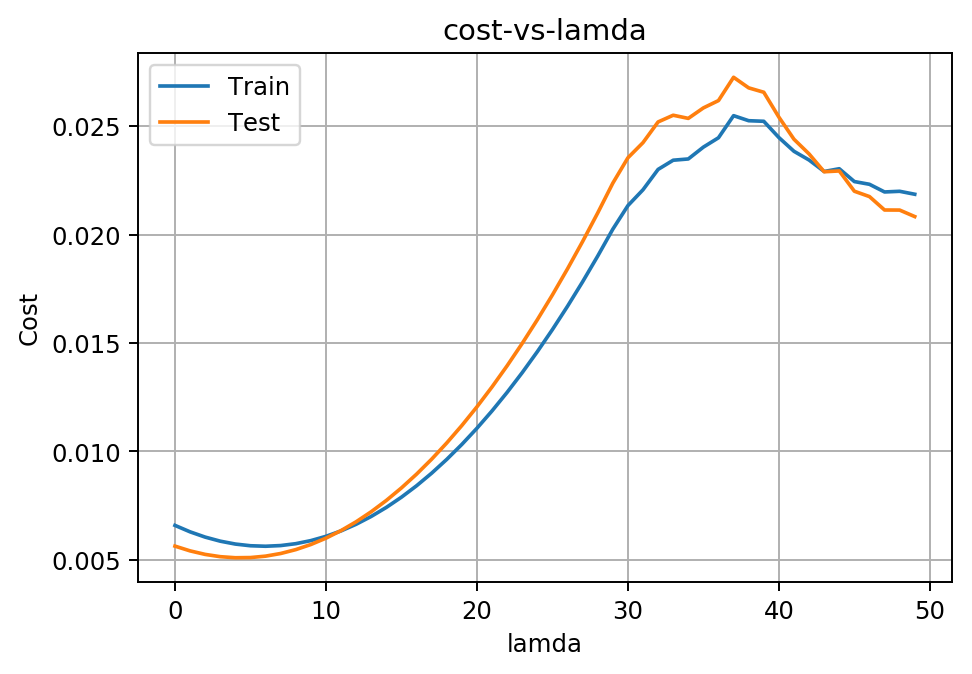

In [24]:
plotter('lamda','Cost','cost-vs-lamda',lamda_values,lamda_mse_train, lamda_mse_validate)
